In [ ]:
#ECE 219 Project 2

import numpy as np
np.random.seed(42)

import random
random.seed(42)

import nltk, string
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

In [ ]:
categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics','comp.sys.mac.hardware', 'comp.os.ms-windows.misc','rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset = 'all', categories = categories, shuffle = True, random_state = 42, remove=('headers', 'footers'))

Question #1 Report the dimensions of the TF-IDF matrix you get

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF Vector
Tfidf_Vector = TfidfVectorizer(stop_words = 'english', min_df = 3)

#TF-IDF Matrix
Tfidf_Matrix = Tfidf_Vector.fit_transform(dataset.data)

print("TF-IDF Matrix shape: ", Tfidf_Matrix.shape)


TF-IDF Matrix shape:  (7882, 23522)


Question #2 Report the contingency table of your clustering result

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score

g_truth = [int(i/4) for i in dataset.target]

#K-Mean Clustering

kmean = KMeans(n_clusters = 2, random_state = 0, max_iter = 1000, n_init = 50)
kmean_predict = kmean.fit_predict(Tfidf_Matrix)
contin_matrix = contingency_matrix(g_truth, kmean_predict)



print("Contingency Table: ", contin_matrix)

Contingency Table:  [[3170  733]
 [  47 3932]]


Does the contingency matrix have to be square-shaped? 

No, if the dataset is balanced i.e. if the number of unique labels which if they only appear at least once in both the true and predicted labels then the matrix will be square-shaped
 

Question# 3 : Report the 5 clustering measures explained in the introduction for Kmeans clustering.


In [ ]:
print("Homogeneity score: ", homogeneity_score(g_truth,kmean_predict))
print("Completeness score: ",completeness_score(g_truth,kmean_predict))
print("V-measure score: ",v_measure_score(g_truth,kmean_predict))
print("Adjusted Rand score: ",adjusted_rand_score(g_truth,kmean_predict))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(g_truth,kmean_predict))

Homogeneity score:  0.5837511791835157
Completeness score:  0.5983621885684702
V-measure score:  0.5909663872931646
Adjusted Rand score:  0.6432885837176757
Adjusted mutual information score:  0.5909284769234616


Question #4: Report the plot of the percentage of variance that the top r principle components retain v.s. r, for r = 1 to 1000.

Text(0, 0.5, 'Total Explained Variance')

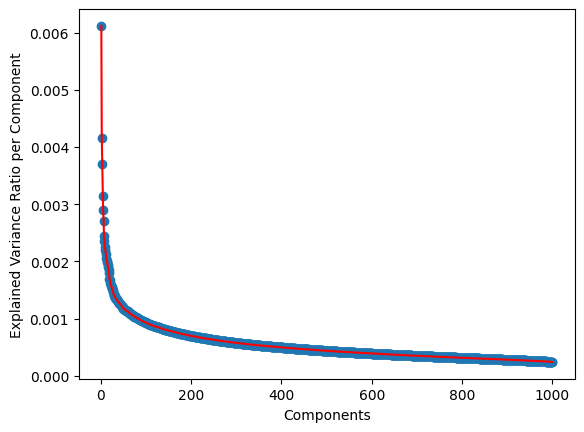

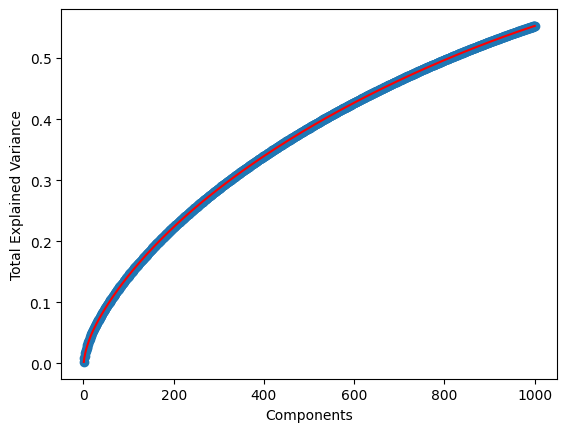

In [ ]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=1000, random_state=42)
svd_train_matrix = SVD.fit_transform(Tfidf_Matrix)

#Plotting per component ration explained variance
plt.figure()
plt.plot(np.arange(1000)+1,sorted(SVD.explained_variance_ratio_,reverse=True), color = 'red')
plt.scatter(np.arange(1000)+1,sorted(SVD.explained_variance_ratio_,reverse=True))
plt.xlabel("Components"); plt.ylabel("Explained Variance Ratio per Component")

plt.figure()
plt.plot(np.arange(1000)+1,np.cumsum(SVD.explained_variance_ratio_), color = 'red')
plt.scatter(np.arange(1000)+1,np.cumsum(SVD.explained_variance_ratio_))
plt.xlabel("Components"); plt.ylabel("Total Explained Variance")

Question #5: Let r be the dimension that we want to reduce the data to (i.e. n components). Try r = 1 − 10, 20, 50, 100, 300, and plot the 5 measure scores v.s. r for both SVD and NMF. Report a good choice of r for SVD and NMF respectively.


In [ ]:

#Dense representation for better K-Means clustering for SVD
r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]
h_score = []
complete_score = []
v_meas_score = []
adj_rand_score = []
adj_mut_info_score = []

for i in r:
  kmean_predict = kmean.fit_predict(TruncatedSVD(n_components = i, random_state = 42).fit_transform(Tfidf_Matrix))
  h_score.append(homogeneity_score(g_truth, kmean_predict))
  complete_score.append(completeness_score(g_truth, kmean_predict))
  v_meas_score.append(v_measure_score(g_truth, kmean_predict))
  adj_rand_score.append(adjusted_rand_score(g_truth, kmean_predict))
  adj_mut_info_score.append(adjusted_mutual_info_score(g_truth, kmean_predict))




SVD
[0.018956544515354657, 0.5299872319287099, 0.5367850707975124, 0.5024767689891753, 0.5148164148429758, 0.5236156697734383, 0.5260710703947462, 0.537327954793755, 0.5458349201631516, 0.5474215248195626, 0.561687101914137, 0.5706032817609463, 0.5712651570193955, 0.5812549696357695]
[0.019260434831635448, 0.5474718149871534, 0.5532677491688455, 0.5278865768783753, 0.5380451727509755, 0.5420889406344178, 0.5442693539631456, 0.5533584393831902, 0.5628584861030622, 0.5642746120047634, 0.5780055102632735, 0.5854624086370032, 0.5860582025920705, 0.5949452135583514]
[0.01910728144974337, 0.5385876569779003, 0.544901792771372, 0.51486835708284, 0.5261745515708813, 0.532692194356621, 0.5350155055466917, 0.5452253921733549, 0.5542160079401561, 0.555720323726244, 0.5697294805305662, 0.577937351641233, 0.5785671365670185, 0.5880204186037479]
[0.025920756456215145, 0.5863908629238136, 0.5957562038017276, 0.5369512180516358, 0.5545743626399822, 0.577485357244855, 0.5805751990281313, 0.597716646766

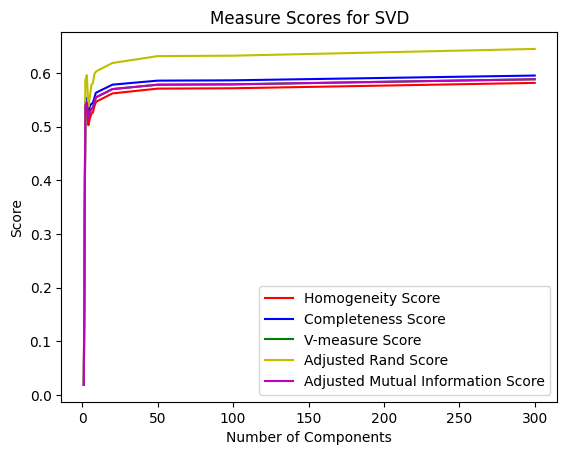

In [ ]:
#Plotting the SVD representation for better K-Means clustering
figure, axis = plt.subplots()
axis.plot(r,h_score, 'r', label='Homogeneity Score')
axis.plot(r, complete_score, 'b', label='Completeness Score')
axis.plot(r, v_meas_score, 'g', label='V-measure Score')
axis.plot(r,adj_rand_score,'y',label='Adjusted Rand Score')
axis.plot(r,adj_mut_info_score,'m',label='Adjusted Mutual Information Score')
axis.legend(loc='best')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("Measure Scores for SVD")
print("SVD")
print(h_score)
print(complete_score)
print(v_meas_score)
print(adj_rand_score)
print(adj_mut_info_score)

In [ ]:
from sklearn.decomposition import NMF

#Dense representation for better K-Means clustering for NMF
r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]
h_score = []
complete_score = []
v_meas_score = []
adj_rand_score = []
adj_mut_info_score = []

for i in r:
    kmean_predict = kmean.fit_predict(NMF(n_components = i, init='random', random_state = 42).fit_transform(Tfidf_Matrix))
    h_score.append(homogeneity_score(g_truth, kmean_predict))
    complete_score.append(completeness_score(g_truth, kmean_predict))
    v_meas_score.append(v_measure_score(g_truth, kmean_predict))
    adj_rand_score.append(adjusted_rand_score(g_truth, kmean_predict))
    adj_mut_info_score.append(adjusted_mutual_info_score(g_truth, kmean_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF
[0.018956544515354657, 0.49465130975968324, 0.19951876419783976, 0.04692504995474571, 0.040791321221174695, 0.04127230889715677, 0.039056839016831595, 0.038657486694680235, 0.20604076139141206, 0.03613763583869197, 0.03147448959307454, 0.03129702733698987, 0.022804025728248495, 0.01673497495346444]
[0.019260434831635448, 0.52035408497699, 0.2947765044994327, 0.16542651155887647, 0.1539550035833579, 0.15643112840263684, 0.1515933118619265, 0.15104055673150027, 0.30168934811342524, 0.13144159172247633, 0.12492257196180623, 0.131468501050522, 0.13576445094529882, 0.08565178315318572]
[0.01910728144974337, 0.5071772642931544, 0.23796887252143872, 0.07311128077804721, 0.06449444436067417, 0.06531271221930507, 0.06211120788658438, 0.061559394148176426, 0.24485568937241323, 0.056689464975497386, 0.05028066578824123, 0.05055828850363574, 0.03904907327465802, 0.027999332575704056]
[0.025920756456215145, 0.5291689826328091, 0.11951375550462902, 0.011097673265433138, 0.00915047637987103, 0.00

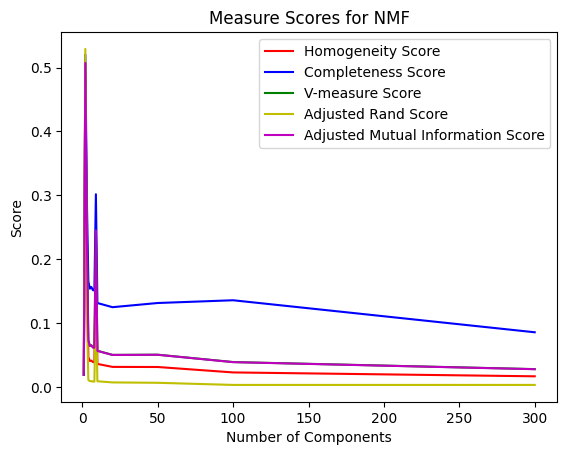

In [ ]:
#Plotting the NMF representation for better K-Means clustering
figure, axis = plt.subplots()
axis.plot(r,h_score, 'r', label='Homogeneity Score')
axis.plot(r, complete_score, 'b', label='Completeness Score')
axis.plot(r, v_meas_score, 'g', label='V-measure Score')
axis.plot(r,adj_rand_score,'y',label='Adjusted Rand Score')
axis.plot(r,adj_mut_info_score,'m',label='Adjusted Mutual Information Score')
axis.legend(loc='best')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("Measure Scores for NMF")
print("NMF")
print(h_score)
print(complete_score)
print(v_meas_score)
print(adj_rand_score)
print(adj_mut_info_score)

Question #6:
The measures exhibit a non-monotonic trend as r grows, showing an initial peak followed by a decrease and then stabilization. This pattern is observed across all measures, as the number of components increases and the dimensions for k-means clustering expand. Due to the Euclidean distance metric's unsuitability in high dimensions, k-means is known to suffer from the curse of dimensionality, as the nearest and farthest points converge in distance. Consequently, clustering becomes difficult, and increasing the number of components beyond the elbow point does not provide additional information to the k-means algorithm. Consequently, the measures do not change beyond the elbow point, as no new information is provided to the algorithm.

Question #7:
On average, they are minisucly better doing a one by one comparison

Question #8:
Visualize the clustering results for:
• SVD with your optimal choice of r for K-Means clustering;
• NMF with your choice of r for K-Means clustering.

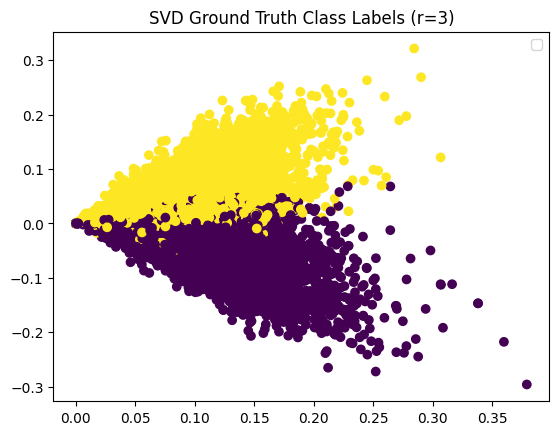

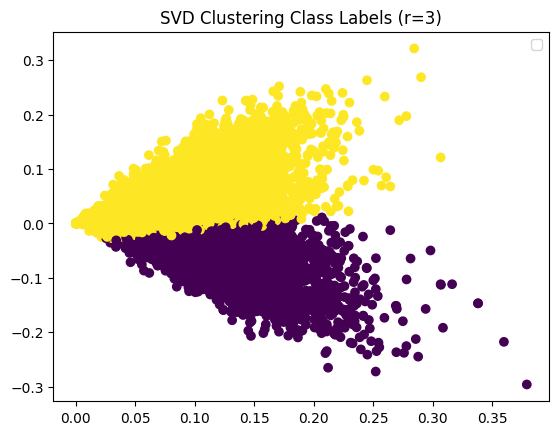

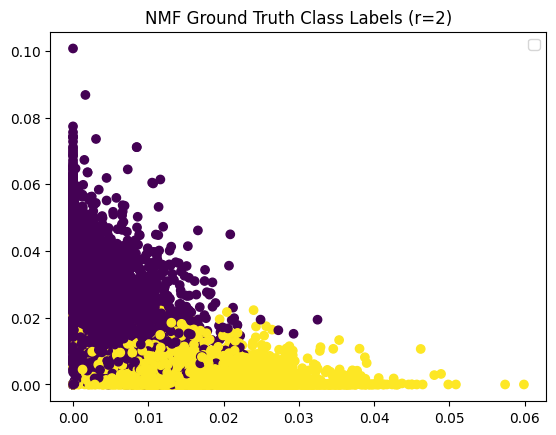

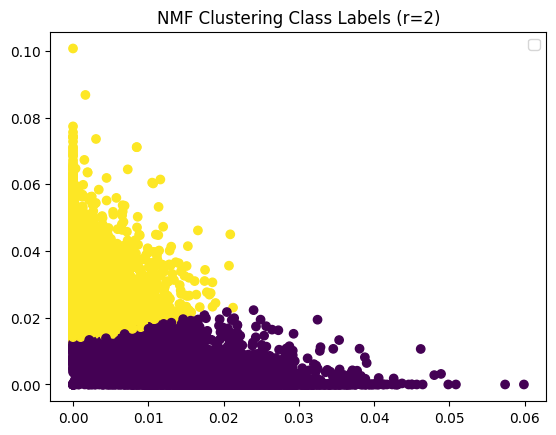

In [ ]:
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans


Best_SVD = 3
Best_NMF = 2


Reduced_data_SVD = TruncatedSVD(n_components = Best_SVD, random_state=0).fit_transform(Tfidf_Matrix)
plt.figure()
plt.scatter(Reduced_data_SVD[:,0], Reduced_data_SVD[:,1], c = g_truth, cmap = 'viridis')
plt.title("SVD Ground Truth Class Labels (r=3)")
plt.legend()


kmean = KMeans(n_clusters = 2, random_state = 0, max_iter = 1000, n_init = 50)
Labels_SVD = kmean.fit_predict(Reduced_data_SVD)
plt.figure()
plt.scatter(Reduced_data_SVD[:,0], Reduced_data_SVD[:,1], c = Labels_SVD, cmap = 'viridis')
plt.title("SVD Clustering Class Labels (r=3)")
plt.legend()

Reduced_data_NMF = NMF(n_components = Best_NMF, init = 'random', random_state = 0).fit_transform(Tfidf_Matrix)
plt.figure()
plt.scatter(Reduced_data_NMF[:,0], Reduced_data_NMF[:,1], c = g_truth, cmap='viridis')
plt.title("NMF Ground Truth Class Labels (r=2)")
plt.legend()

NMF_Labels = kmean.fit_predict(Reduced_data_NMF)
plt.figure()
plt.scatter(Reduced_data_NMF[:,0], Reduced_data_NMF[:,1], c = NMF_Labels, cmap='viridis')
plt.title("NMF Clustering Class Labels (r=2)")
plt.legend()




Question #9: The data visualized here does not reflect the usual K-Mean clustering because the data points overlap each other. An ideal K-Mean clustering algorithm should have the data points in well-separated clusters

Question #10:
Load documents with the same configuration as in Question 1, but for
ALL 20 categories. Construct the TF-IDF matrix, reduce its dimensionality using BOTH NMF
and SVD (specify settings you choose and why), and perform K-Means clustering with k=20 .
Visualize the contingency matrix and report the five clustering metrics (DO BOTH
NMF AND SVD).


Contingency Table for all 20 Categories:  [[  1 143   1   0  97   0  93   5   0   0   0 279   2   0   0   0   0 172
    6   0]
 [  0   0   0   0 278  37  32 134   0   0   0  10   0 333  29  55   6  44
    0  15]
 [  0   0   0   0 153  62  26  74  20   0   0   9   0  43 415  96   2  52
    0  33]
 [  3   0   3   0 157 187  42 102 217   0   0   3   0   5  46 168  12  36
    0   1]
 [  0   0   1   0 137 522  18  63  97   0   0   4   0   5   6  46   8  55
    0   1]
 [  0   0   5   0 200  11  22 101   1   0   0   2   0  33  58   6   7  27
    0 515]
 [ 22   0   0   8 228  61  18  72  52   0   0   8   0   1  12  28 435  29
    0   1]
 [445   0   0   0 233   0 118  42   2   0   0  28   0   0   2   0   9 108
    1   2]
 [ 39   0   0   2 402   0 305  38   5   0   0  31   0   0   0   0   9 164
    0   1]
 [  0   0   0 382 262   0  89  45   0   0   0  20   0   1   0   0   4 191
    0   0]
 [  0   0   0 699 166   0  19  20   0   0   0  17   0   0   0   0  12  66
    0   0]
 [  1   0 466   0 149  

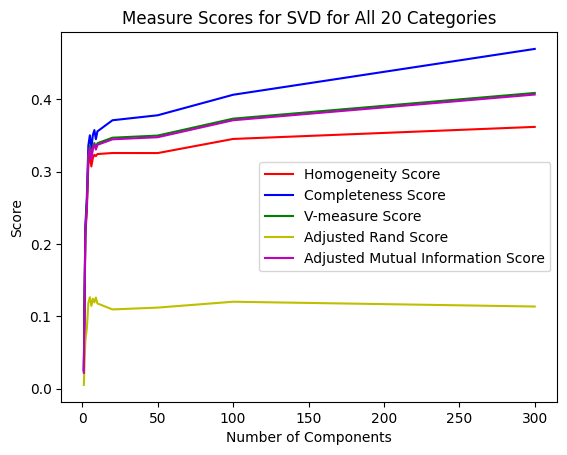

In [ ]:
dataset20 = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=('headers', 'footers'))
g_truth_20 = dataset20.target

kmean_20 = KMeans(n_clusters = 20, random_state = 0, max_iter = 1000, n_init = 50)

Tfidf_Matrix_20 = Tfidf_Vector.fit_transform(dataset20.data)
kmean_predict_20 = kmean_20.fit_predict(Tfidf_Matrix_20)
contin_matrix_20 = contingency_matrix(g_truth_20, kmean_predict_20)

print("Contingency Table for all 20 Categories: ", contin_matrix_20)

print("Homogeneity score: ", homogeneity_score(g_truth_20,kmean_predict_20))
print("Completeness score: ",completeness_score(g_truth_20,kmean_predict_20))
print("V-measure score: ",v_measure_score(g_truth_20,kmean_predict_20))
print("Adjusted Rand score: ",adjusted_rand_score(g_truth_20,kmean_predict_20))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(g_truth_20,kmean_predict_20))

#SVD for all 20 categories

r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]
h_score = []
complete_score = []
v_meas_score = []
adj_rand_score = []
adj_mut_info_score = []

for i in r:
  kmean_predict_20 = kmean_20.fit_predict(TruncatedSVD(n_components = i, random_state = 42).fit_transform(Tfidf_Matrix_20))
  h_score.append(homogeneity_score(g_truth_20, kmean_predict_20))
  complete_score.append(completeness_score(g_truth_20, kmean_predict_20))
  v_meas_score.append(v_measure_score(g_truth_20, kmean_predict_20))
  adj_rand_score.append(adjusted_rand_score(g_truth_20, kmean_predict_20))
  adj_mut_info_score.append(adjusted_mutual_info_score(g_truth_20, kmean_predict_20))

#Plotting the SVD representation for better K-Means clustering for all 20 categories
figure, axis = plt.subplots()
axis.plot(r,h_score, 'r', label='Homogeneity Score')
axis.plot(r, complete_score, 'b', label='Completeness Score')
axis.plot(r, v_meas_score, 'g', label='V-measure Score')
axis.plot(r,adj_rand_score,'y',label='Adjusted Rand Score')
axis.plot(r,adj_mut_info_score,'m',label='Adjusted Mutual Information Score')
axis.legend(loc='best')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("Measure Scores for SVD for All 20 Categories")
print("SVD")
print(h_score)
print(complete_score)
print(v_meas_score)
print(adj_rand_score)
print(adj_mut_info_score)




/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF
[0.02414477211123332, 0.1912056689667014, 0.2186383223258225, 0.24690551862591745, 0.297368780469481, 0.2595136470872969, 0.2976486521884839, 0.2893767865520299, 0.29219319923278886, 0.3236107770523622, 0.31954449081682096, 0.21490892360487884, 0.15543395044809705, 0.07590953930290195]
[0.026109012106166563, 0.20432644325820276, 0.2366967277284554, 0.2940512708055242, 0.3325269314588892, 0.2884623775541164, 0.3314271642984859, 0.31883761125442195, 0.3346634883411802, 0.3567531327995482, 0.3856259773255632, 0.286956578439138, 0.20522411781692143, 0.10709875443742181]
[0.02508850456418185, 0.1975484319136985, 0.22730943047056248, 0.26842395895300764, 0.3139666653023136, 0.27322335387037666, 0.3136310319573026, 0.3033936839031903, 0.3119896373866978, 0.33937472828697013, 0.3494889878041665, 0.2457611816015412, 0.17689217664233675, 0.08884643360256633]
[0.005069466603507795, 0.05764558714976883, 0.06473139112283063, 0.07629393223527081, 0.10347936842992879, 0.0919140141917494, 0.110634

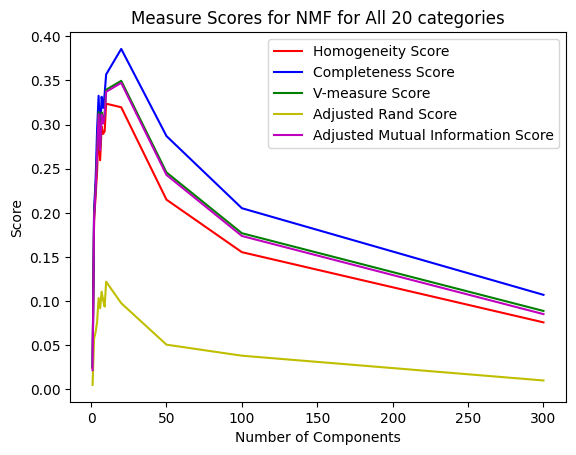

In [ ]:
#NMF
#Dense representation for better K-Means clustering for NMF for all 20 categories
r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]
h_score = []
complete_score = []
v_meas_score = []
adj_rand_score = []
adj_mut_info_score = []

for i in r:
    kmean_predict_20 = kmean_20.fit_predict(NMF(n_components = i, init='random', random_state = 42).fit_transform(Tfidf_Matrix_20))
    h_score.append(homogeneity_score(g_truth_20, kmean_predict_20))
    complete_score.append(completeness_score(g_truth_20, kmean_predict_20))
    v_meas_score.append(v_measure_score(g_truth_20, kmean_predict_20))
    adj_rand_score.append(adjusted_rand_score(g_truth_20, kmean_predict_20))
    adj_mut_info_score.append(adjusted_mutual_info_score(g_truth_20, kmean_predict_20))

figure, axis = plt.subplots()
axis.plot(r,h_score, 'r', label='Homogeneity Score')
axis.plot(r, complete_score, 'b', label='Completeness Score')
axis.plot(r, v_meas_score, 'g', label='V-measure Score')
axis.plot(r,adj_rand_score,'y',label='Adjusted Rand Score')
axis.plot(r,adj_mut_info_score,'m',label='Adjusted Mutual Information Score')
axis.legend(loc='best')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("Measure Scores for NMF for All 20 categories")
print("NMF")
print(h_score)
print(complete_score)
print(v_meas_score)
print(adj_rand_score)
print(adj_mut_info_score)

### We see that the best r in NMF for all 20 categories is 20
### We also see that the best r in SVD for all 20 categories is 300 

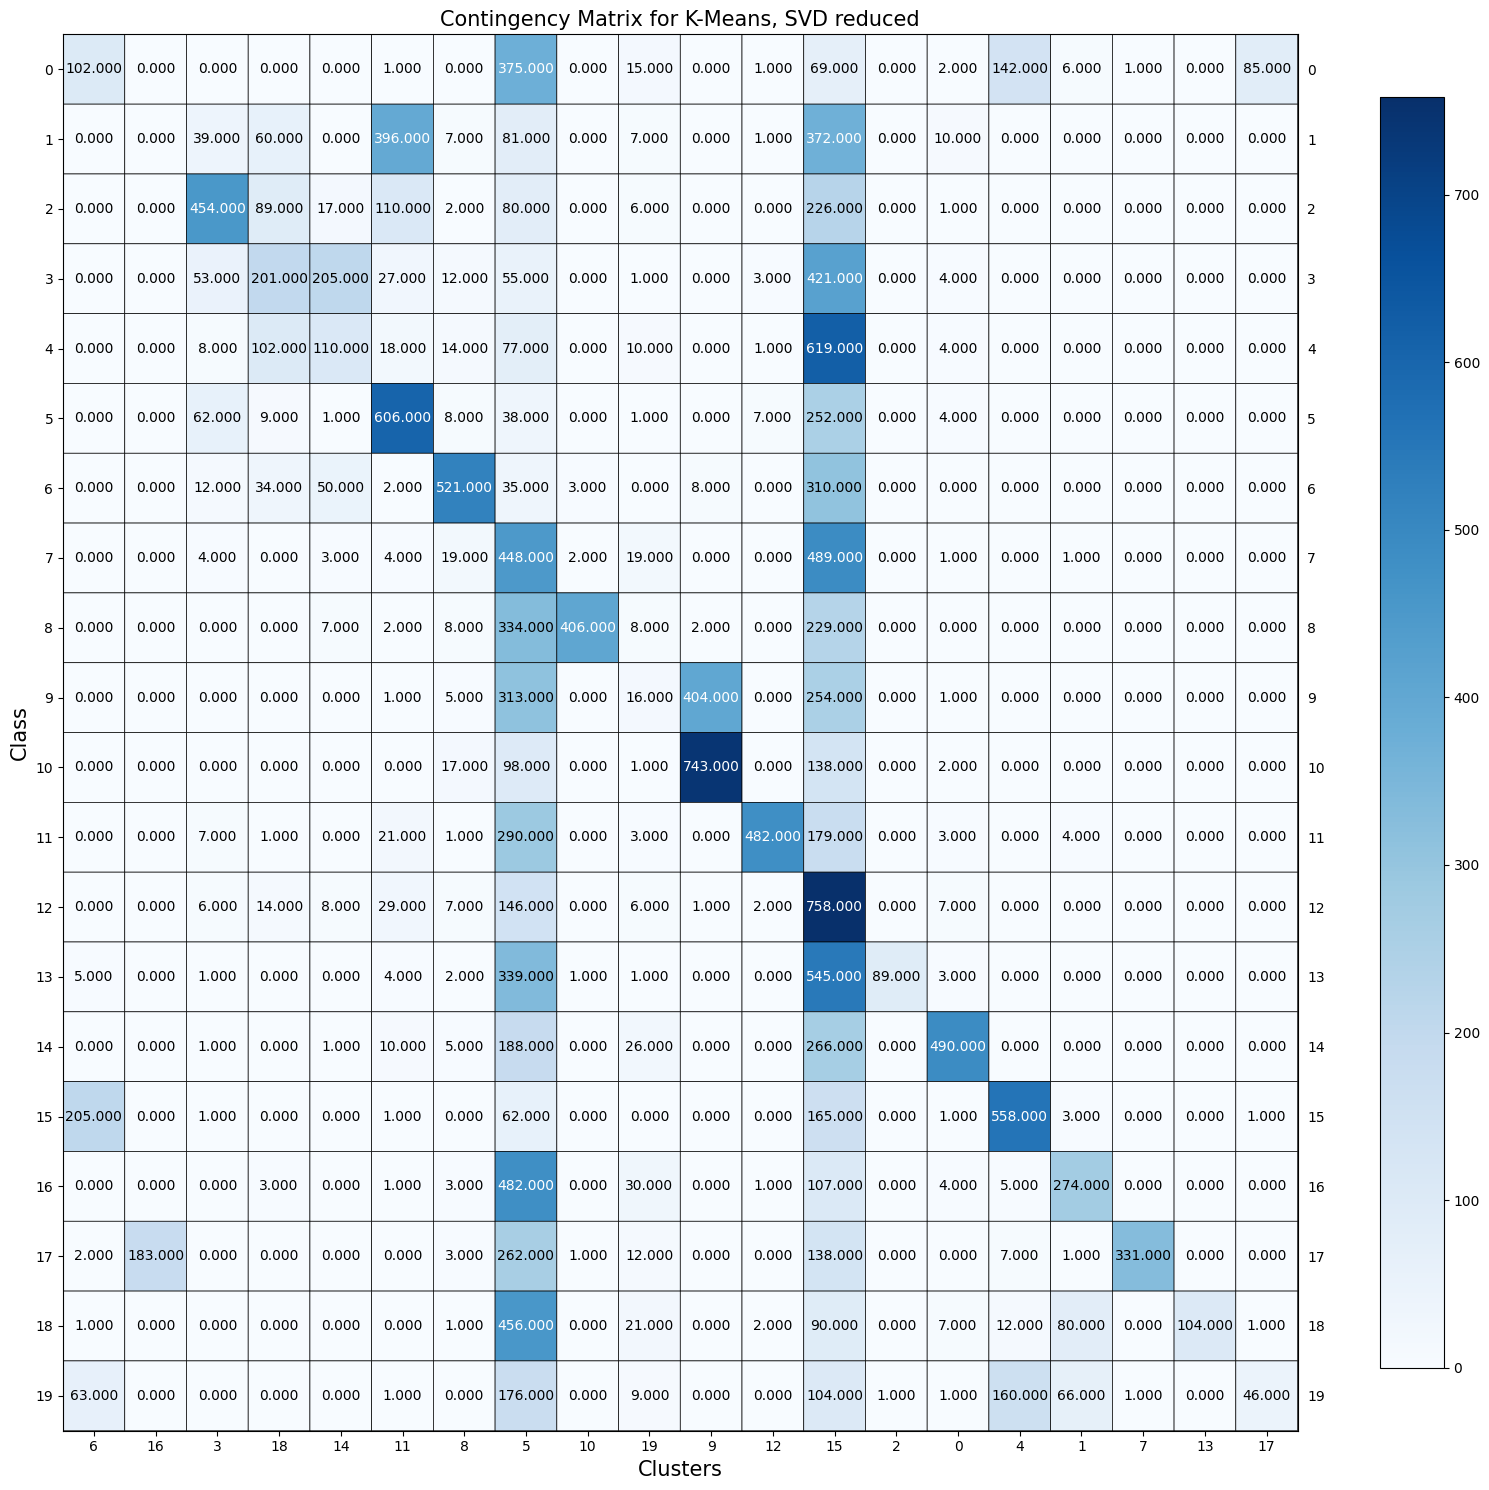


Homogeneity = 0.36191649318848534 
Completeness = 0.4697474743912917 
V-measure = 0.4088414678120248 
Adjusted Rand Index = 0.1134968550097584 
Adjusted mutual information score = 0.4066638580904045 







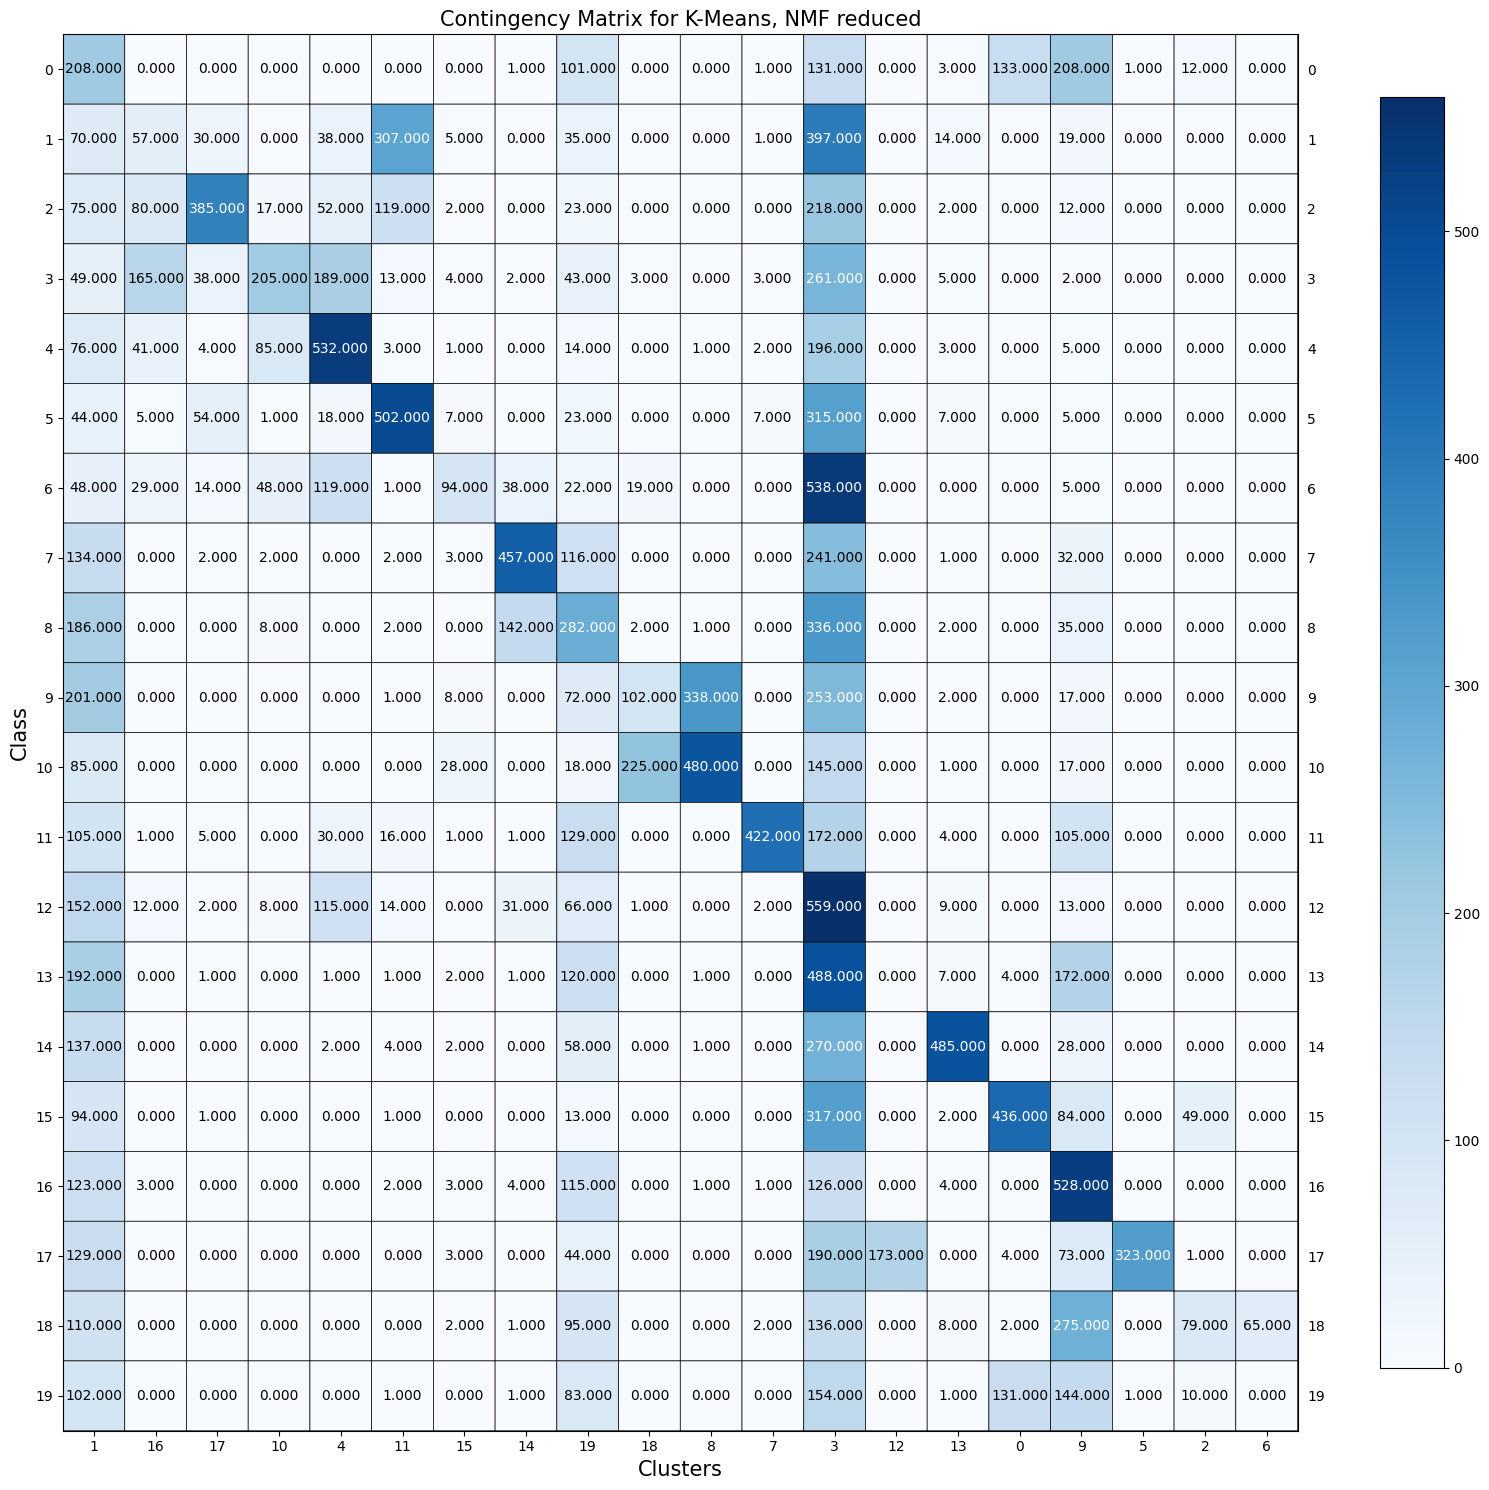


Homogeneity = 0.31954449081682096 
Completeness = 0.3856259773255632 
V-measure = 0.3494889878041665 
Adjusted Rand Index = 0.09765643321750891 
Adjusted mutual information score = 0.3471709421642408 


In [ ]:
from sklearn.metrics import confusion_matrix
from plotmat import plot_mat # using the provided plotmat.py
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

Truth_Labels_20 = dataset20.target

Best_SVD_20 = 300
kmean_SVD_predict_20 = kmean_20.fit_predict(TruncatedSVD(n_components = Best_SVD_20, random_state = 42).fit_transform(Tfidf_Matrix_20))
cm_SVD = confusion_matrix(Truth_Labels_20, kmean_SVD_predict_20)
rows, cols = linear_sum_assignment(cm_SVD, maximize=True)
plot_mat(cm_SVD[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15), title='Contingency Matrix for K-Means, SVD reduced'.format(i), xlabel='Clusters', ylabel='Class')
print()
print('Homogeneity = {} '.format(homogeneity_score(Truth_Labels_20, kmean_SVD_predict_20)))
print('Completeness = {} '.format(completeness_score(Truth_Labels_20,  kmean_SVD_predict_20)))
print('V-measure = {} '.format(v_measure_score(Truth_Labels_20,  kmean_SVD_predict_20)))
print('Adjusted Rand Index = {} '.format(adjusted_rand_score(Truth_Labels_20,  kmean_SVD_predict_20)))
print('Adjusted mutual information score = {} '.format(adjusted_mutual_info_score(Truth_Labels_20,  kmean_SVD_predict_20)))
print('\n\n\n\n')

Best_NMF_20 = 20
kmean_NMF_predict_20 = kmean_20.fit_predict(NMF(n_components = Best_NMF_20, init='random', random_state = 42).fit_transform(Tfidf_Matrix_20))
cm_NMF = confusion_matrix(Truth_Labels_20, kmean_NMF_predict_20)
rows, cols = linear_sum_assignment(cm_NMF, maximize=True)
plot_mat(cm_NMF[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15), title='Contingency Matrix for K-Means, NMF reduced'.format(i), xlabel='Clusters', ylabel='Class')
print()
print('Homogeneity = {} '.format(homogeneity_score(Truth_Labels_20, kmean_NMF_predict_20)))
print('Completeness = {} '.format(completeness_score(Truth_Labels_20,  kmean_NMF_predict_20)))
print('V-measure = {} '.format(v_measure_score(Truth_Labels_20,  kmean_NMF_predict_20)))
print('Adjusted Rand Index = {} '.format(adjusted_rand_score(Truth_Labels_20,  kmean_NMF_predict_20)))
print('Adjusted mutual information score = {} '.format(adjusted_mutual_info_score(Truth_Labels_20,  kmean_NMF_predict_20)))

# Question 11

In [ ]:
#Fetch data for 20 categories
import numpy as np
import random
np.random.seed(42)
random.seed(42)

from sklearn.datasets import fetch_20newsgroups

dataset20 = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=('headers', 'footers'))
Truth_Labels_20 = dataset20.target

In [ ]:
#Construct TF-IDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_Vectorizer = TfidfVectorizer(min_df=3, stop_words='english')

#Tfidf_Matrix = Tfidf_Vector.fit_transform(dataset20.data)
Tfidf_Matrix_20 = Tfidf_Vectorizer.fit_transform(dataset20.data)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=679ae4c7b99981487392c38d4cb9e2bcd39a1f565a5814f9264ee18305b05214
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=123d9ae52aeb4ff6624d04f50d84709a24d3d717107d1293ce24ba70435c8565
  Stored in directory: /root/.c

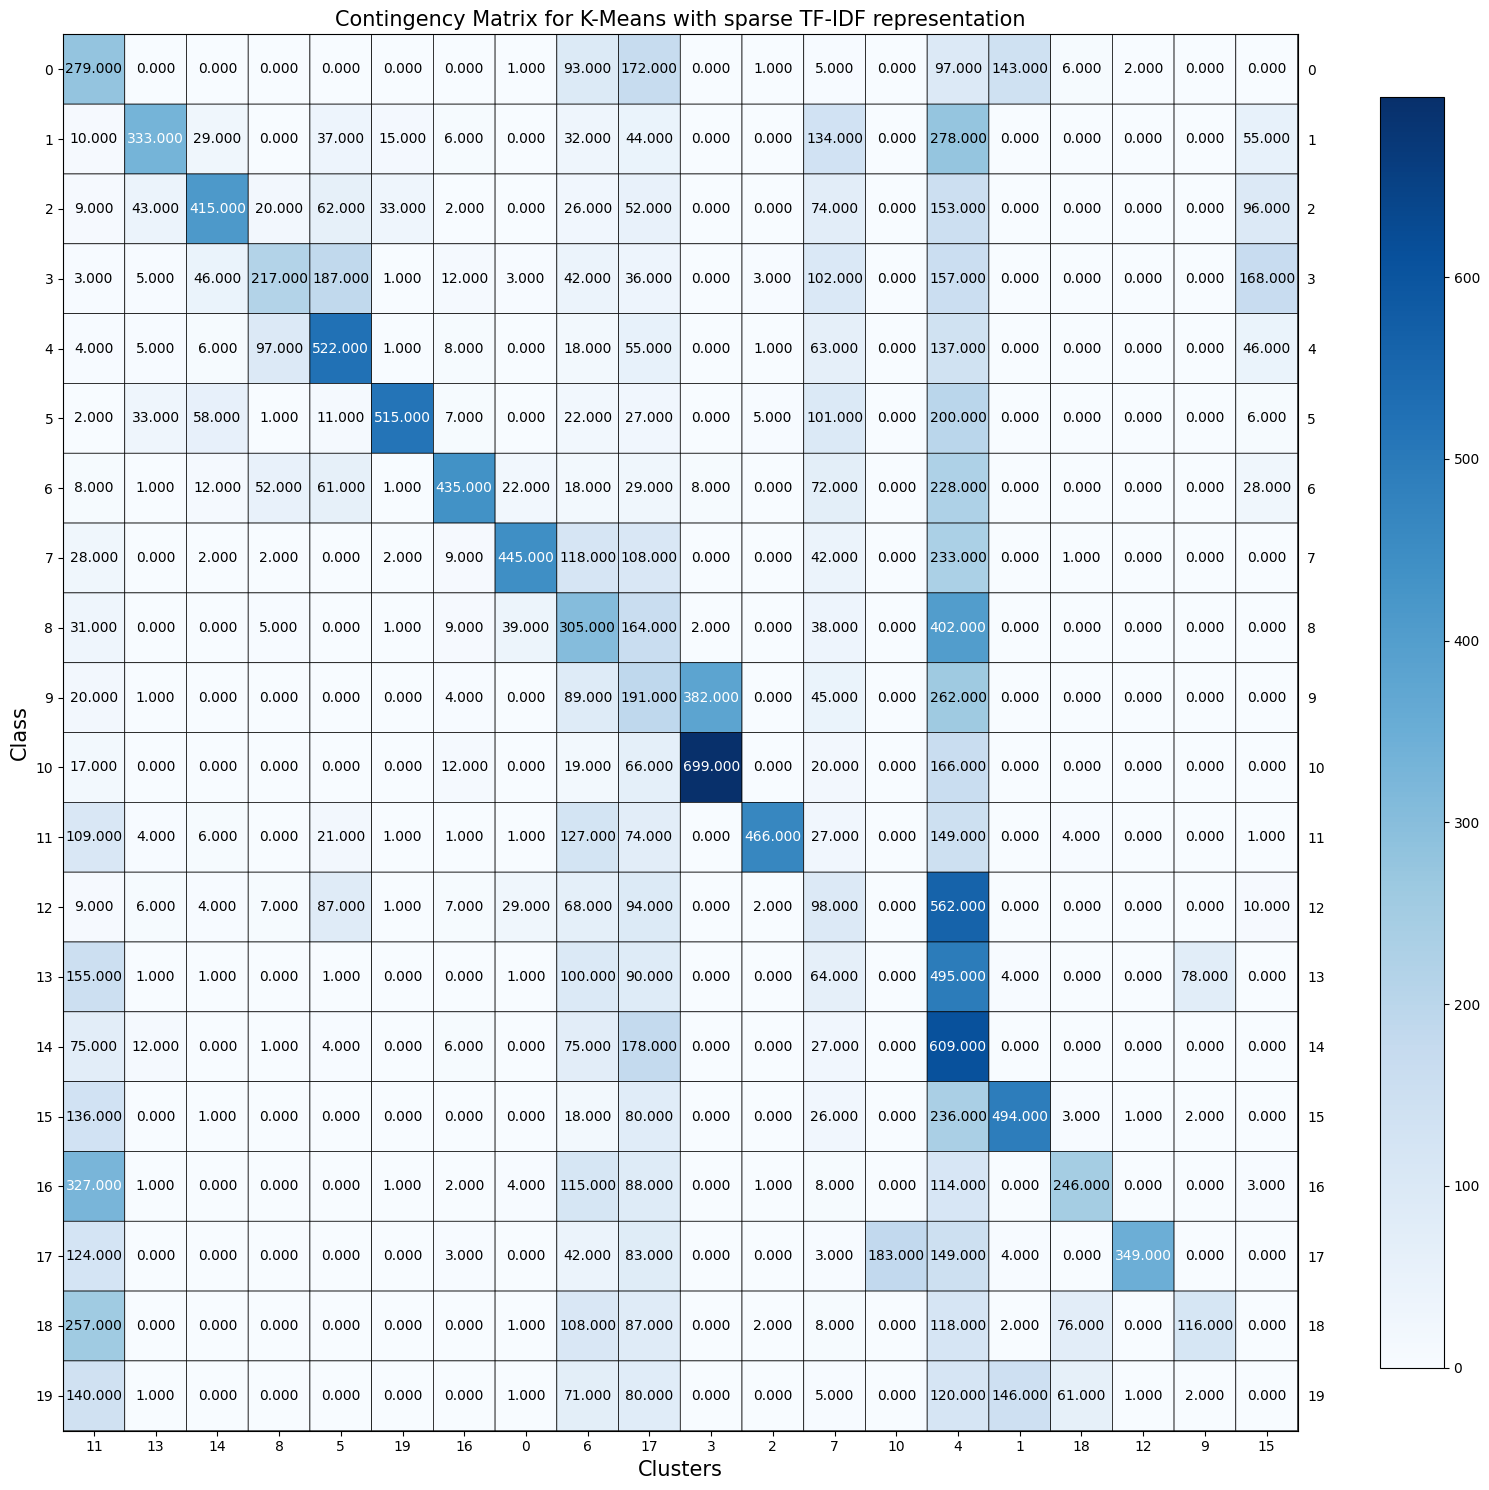


Homogeneity = 0.34724392572568125 
Completeness = 0.3973507605139372 
V-measure = 0.37061139575885155 
Adjusted Rand Index = 0.12499477311446437 
Adjusted mutual information score = 0.36843584716617084 


In [ ]:
#Reduce dimensioanlity with UMAP
!pip install umap-learn[plot]
#!pip install -U ipykernel
import umap
from sklearn.cluster import KMeans
#!python plotmat.py
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score
from plotmat import plot_mat # using the provided plotmat.py
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

kmean_20 = KMeans(n_clusters = 20, random_state = 0, max_iter = 1000, n_init = 50)  
kmean_predict_20 = kmean_20.fit_predict(Tfidf_Matrix_20)
contin_matrix_20 = contingency_matrix(Truth_Labels_20, kmean_predict_20)

print("Contingency Table for all 20 Categories: ", contin_matrix_20)

cm = confusion_matrix(Truth_Labels_20, kmean_predict_20)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15), title='Contingency Matrix for K-Means with sparse TF-IDF representation'.format(i), xlabel='Clusters', ylabel='Class')
print()
print('Homogeneity = {} '.format(homogeneity_score(Truth_Labels_20, kmean_predict_20)))
print('Completeness = {} '.format(completeness_score(Truth_Labels_20,  kmean_predict_20)))
print('V-measure = {} '.format(v_measure_score(Truth_Labels_20,  kmean_predict_20)))
print('Adjusted Rand Index = {} '.format(adjusted_rand_score(Truth_Labels_20,  kmean_predict_20)))
print('Adjusted mutual information score = {} '.format(adjusted_mutual_info_score(Truth_Labels_20,  kmean_predict_20)))





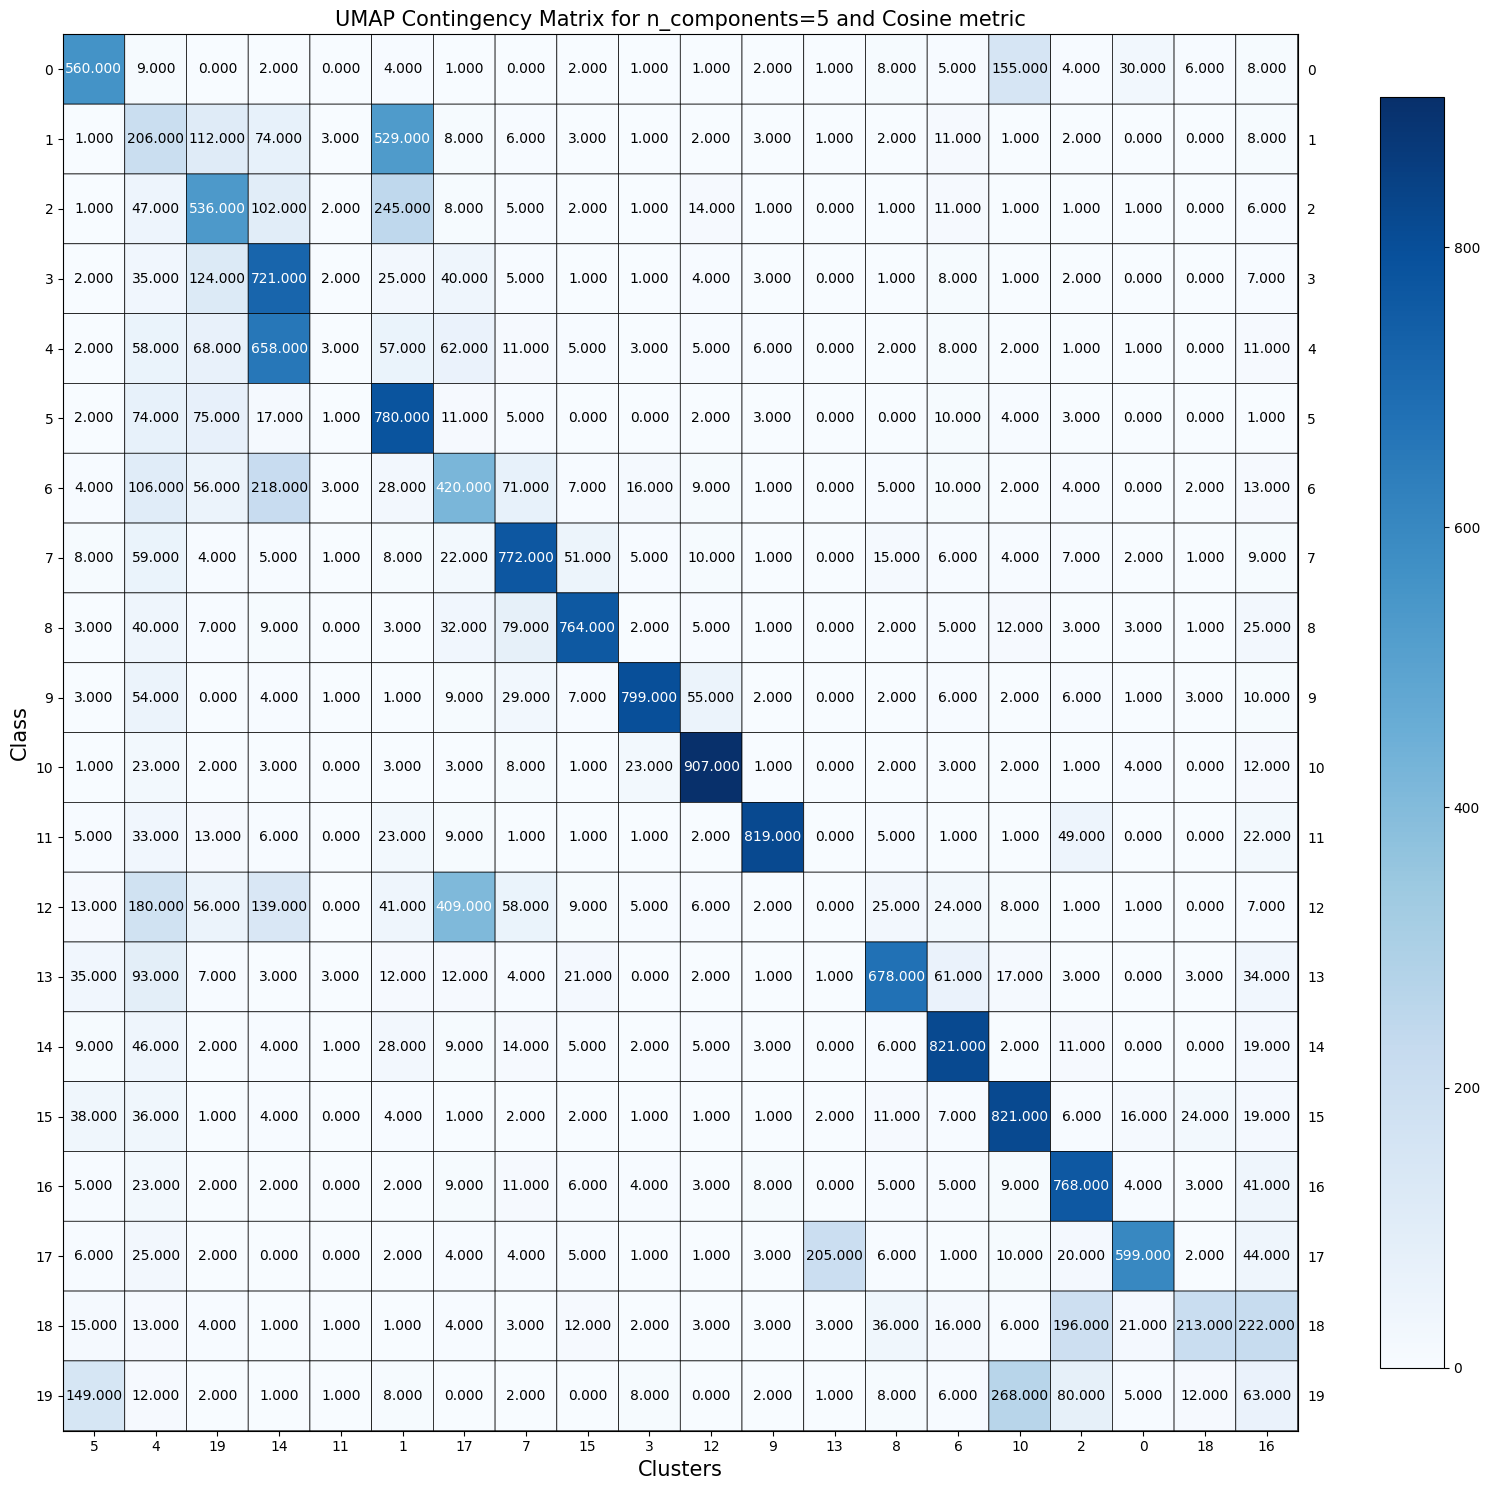


Homogeneity for 5 components and Cosine metric is 0.5700423154213698 
Completeness for 5 components and Cosine metric is 0.5966318233273011 
V-measure for 5 components and Cosine metric is 0.5830340704875007 
Adjusted Rand Index for 5 components and Cosine metric is 0.4467796214340838 
Adjusted mutual information score for 5 components and Cosine metric is 0.5816445358231803 

 
 
 
 


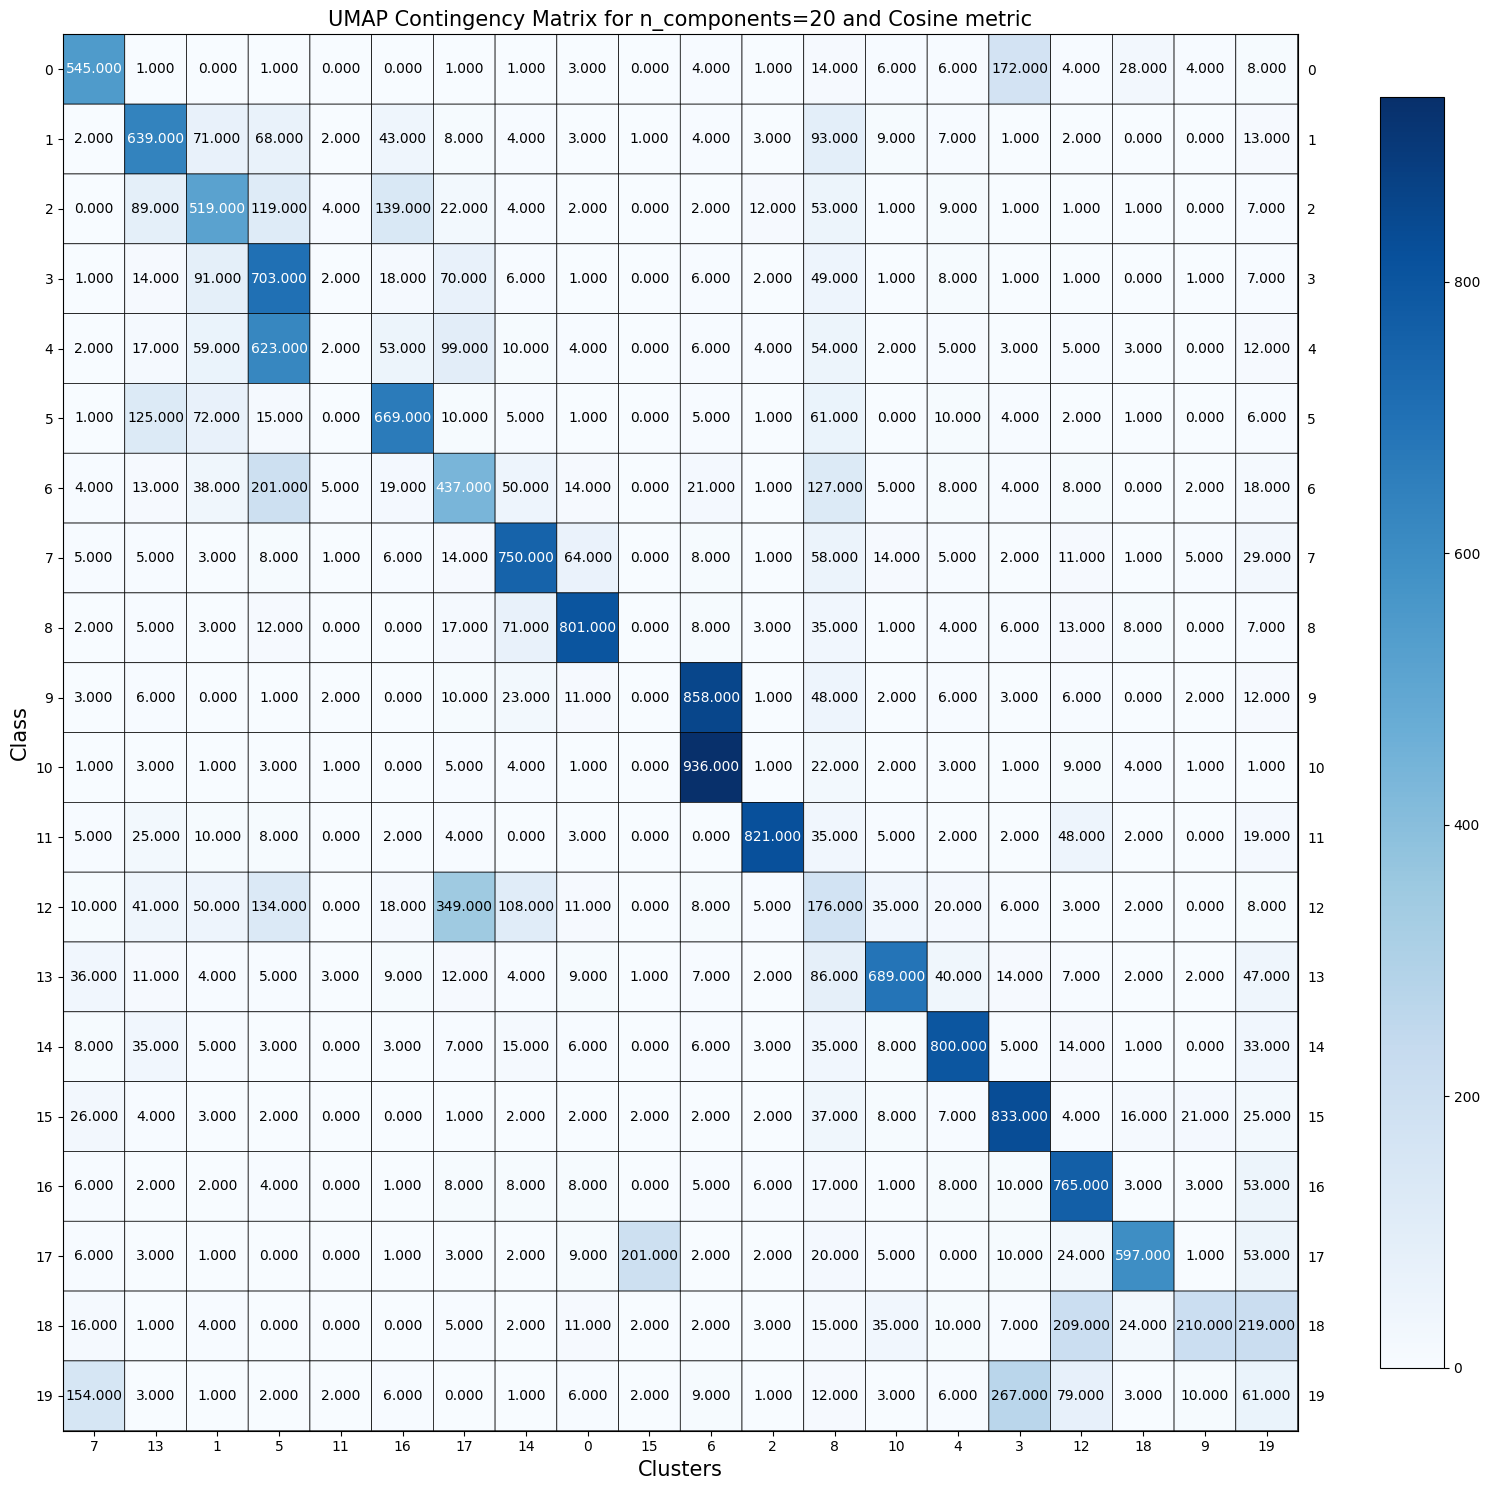


Homogeneity for 20 components and Cosine metric is 0.5619065073841739 
Completeness for 20 components and Cosine metric is 0.5879863150344745 
V-measure for 20 components and Cosine metric is 0.5746506634866599 
Adjusted Rand Index for 20 components and Cosine metric is 0.44421672690834096 
Adjusted mutual information score for 20 components and Cosine metric is 0.5732330818885678 

 
 
 
 


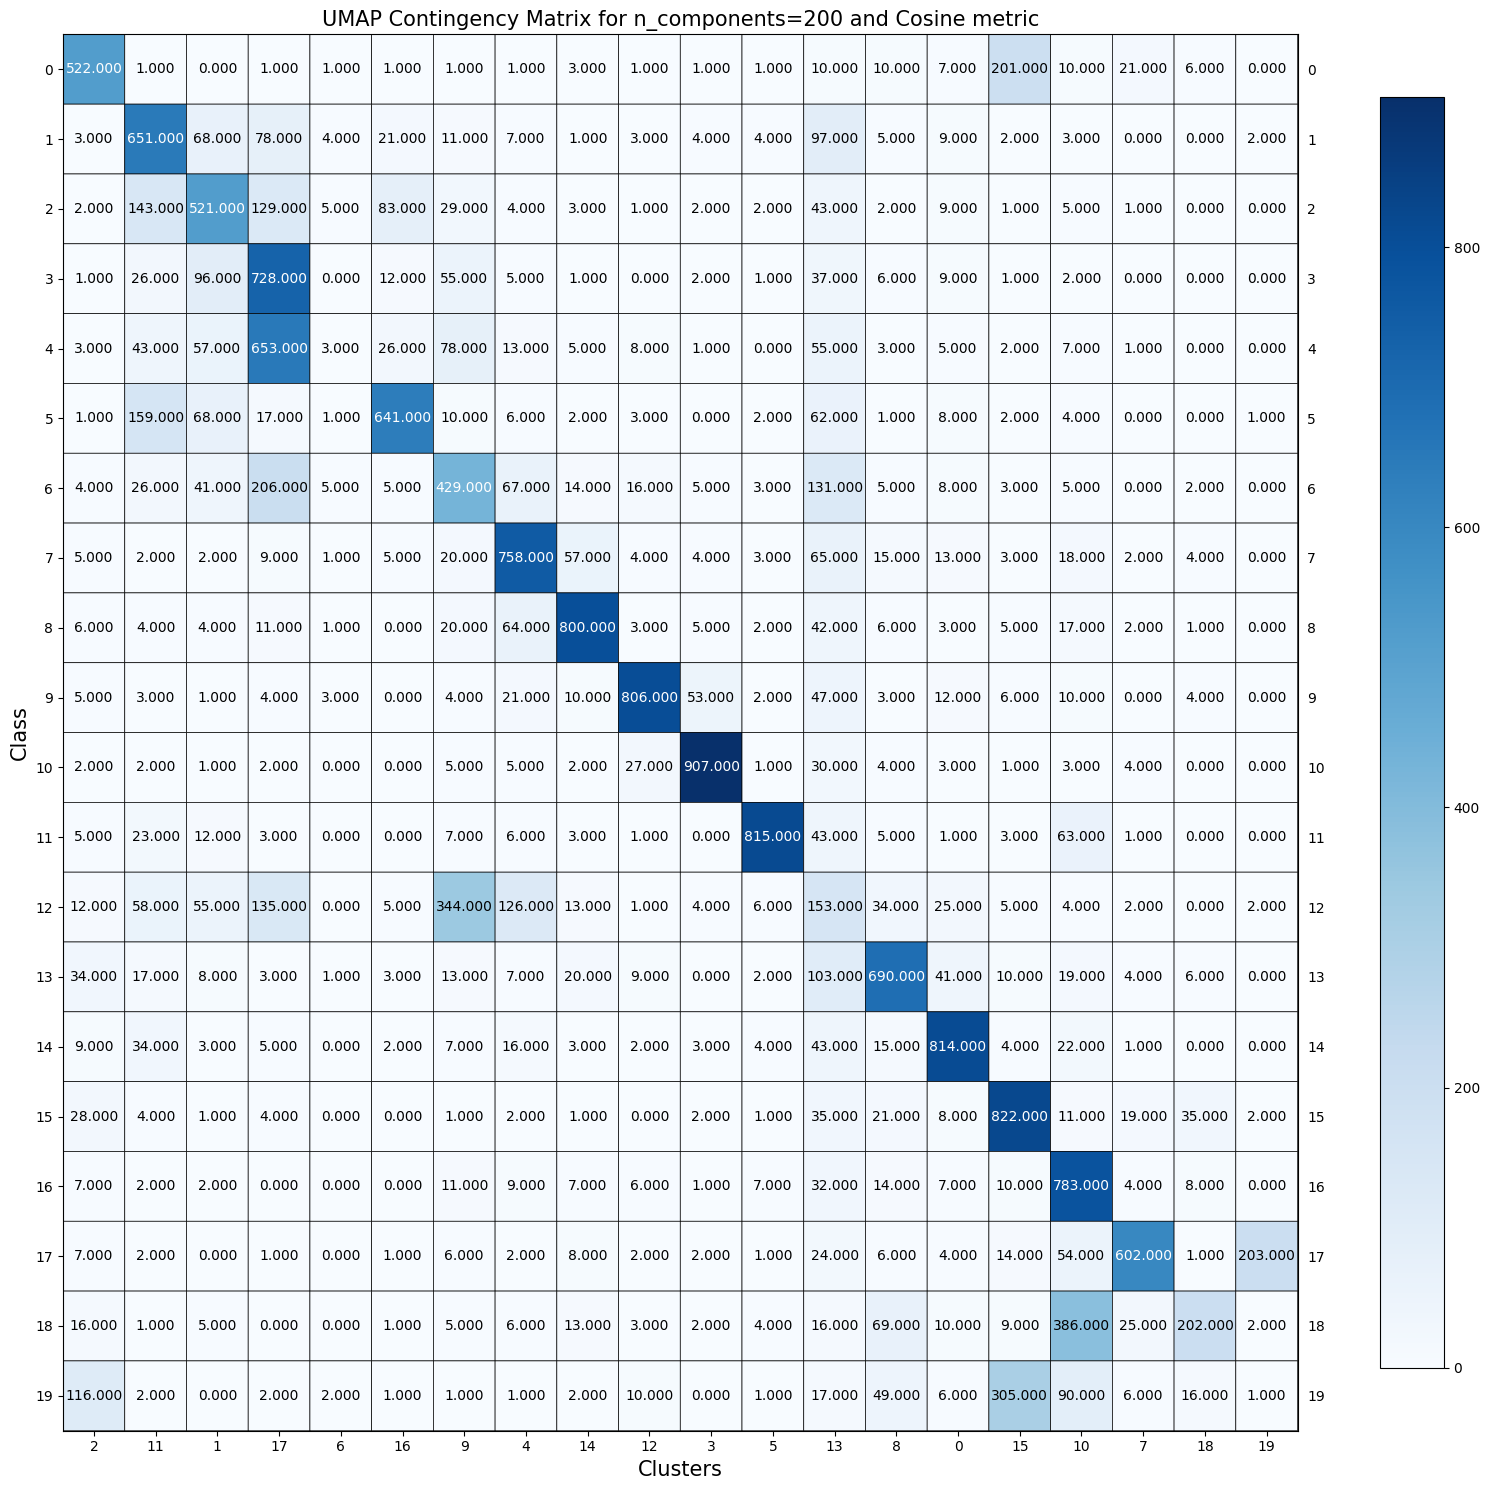


Homogeneity for 200 components and Cosine metric is 0.5712915164066006 
Completeness for 200 components and Cosine metric is 0.5952460724772065 
V-measure for 200 components and Cosine metric is 0.5830228440490454 
Adjusted Rand Index for 200 components and Cosine metric is 0.45156171687987073 
Adjusted mutual information score for 200 components and Cosine metric is 0.5816362750117148 

 
 
 
 


In [ ]:
#Cosine

n_comps = [5, 20, 200]

for i in n_comps:
    Tfidf_UMAP_Embedding = umap.UMAP(n_components=i, metric='cosine').fit_transform(Tfidf_Matrix_20)
    Labels_UMAP = kmean_20.fit_predict(Tfidf_UMAP_Embedding)
    cm = confusion_matrix(Truth_Labels_20, Labels_UMAP)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15), title='UMAP Contingency Matrix for n_components={} and Cosine metric'.format(i), xlabel='Clusters', ylabel='Class')
    print()
    print('Homogeneity for {} components and Cosine metric is {} '.format(i,homogeneity_score(Truth_Labels_20, Labels_UMAP)))
    print('Completeness for {} components and Cosine metric is {} '.format(i,completeness_score(Truth_Labels_20, Labels_UMAP)))
    print('V-measure for {} components and Cosine metric is {} '.format(i, v_measure_score(Truth_Labels_20, Labels_UMAP)))
    print('Adjusted Rand Index for {} components and Cosine metric is {} '.format(i,adjusted_rand_score(Truth_Labels_20, Labels_UMAP)))
    print('Adjusted mutual information score for {} components and Cosine metric is {} '.format(i,adjusted_mutual_info_score(Truth_Labels_20, Labels_UMAP)))
    print('\n \n \n \n ')

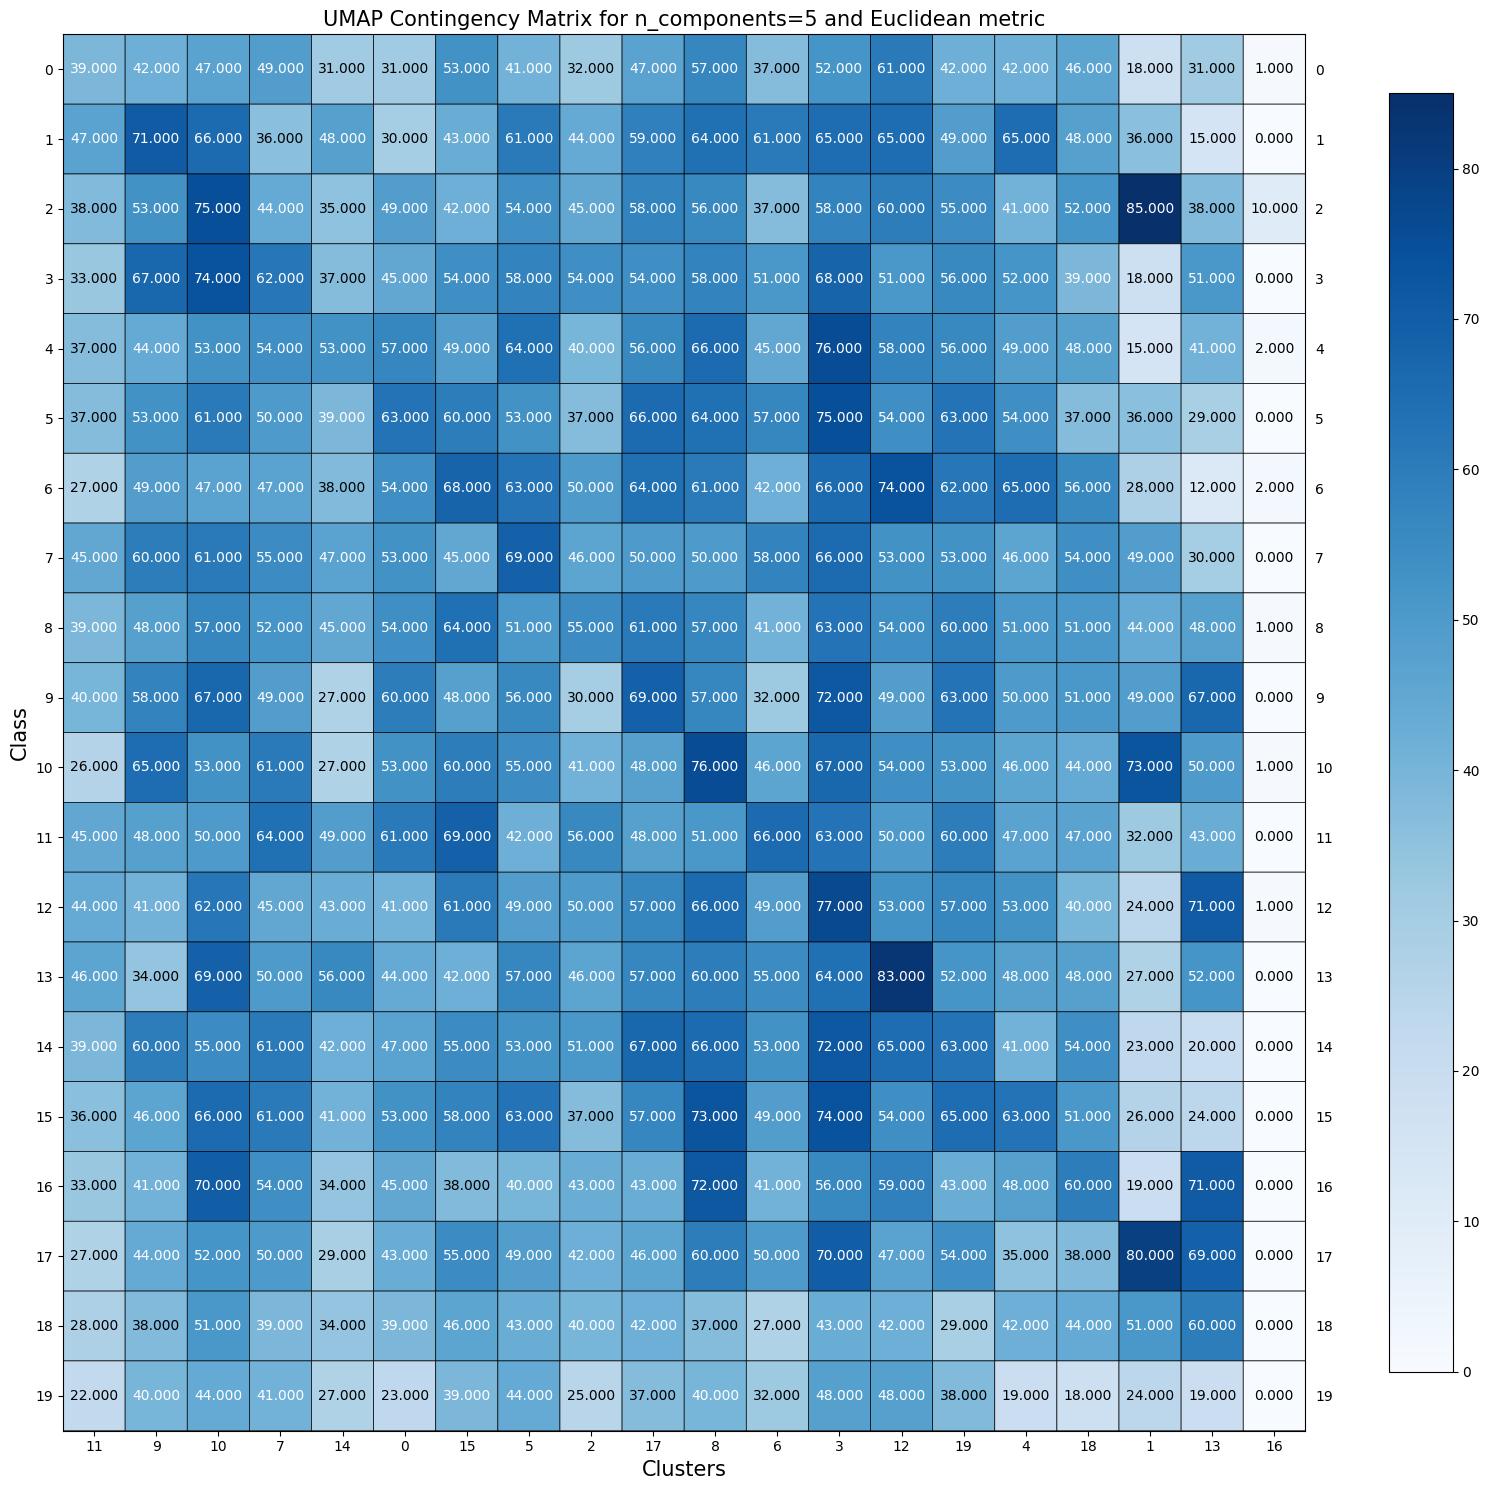


Homogeneity for 5 components and Euclidean metric is 0.007184453885489707 
Completeness for 5 components and Euclidean metric is 0.007313311089820893 
V-measure for 5 components and Euclidean metric is 0.007248309841487553 
Adjusted Rand Index for 5 components and Euclidean metric is 0.0009790551657338838 
Adjusted mutual information score for 5 components and Euclidean metric is 0.003992014599668128 

 
 
 
 


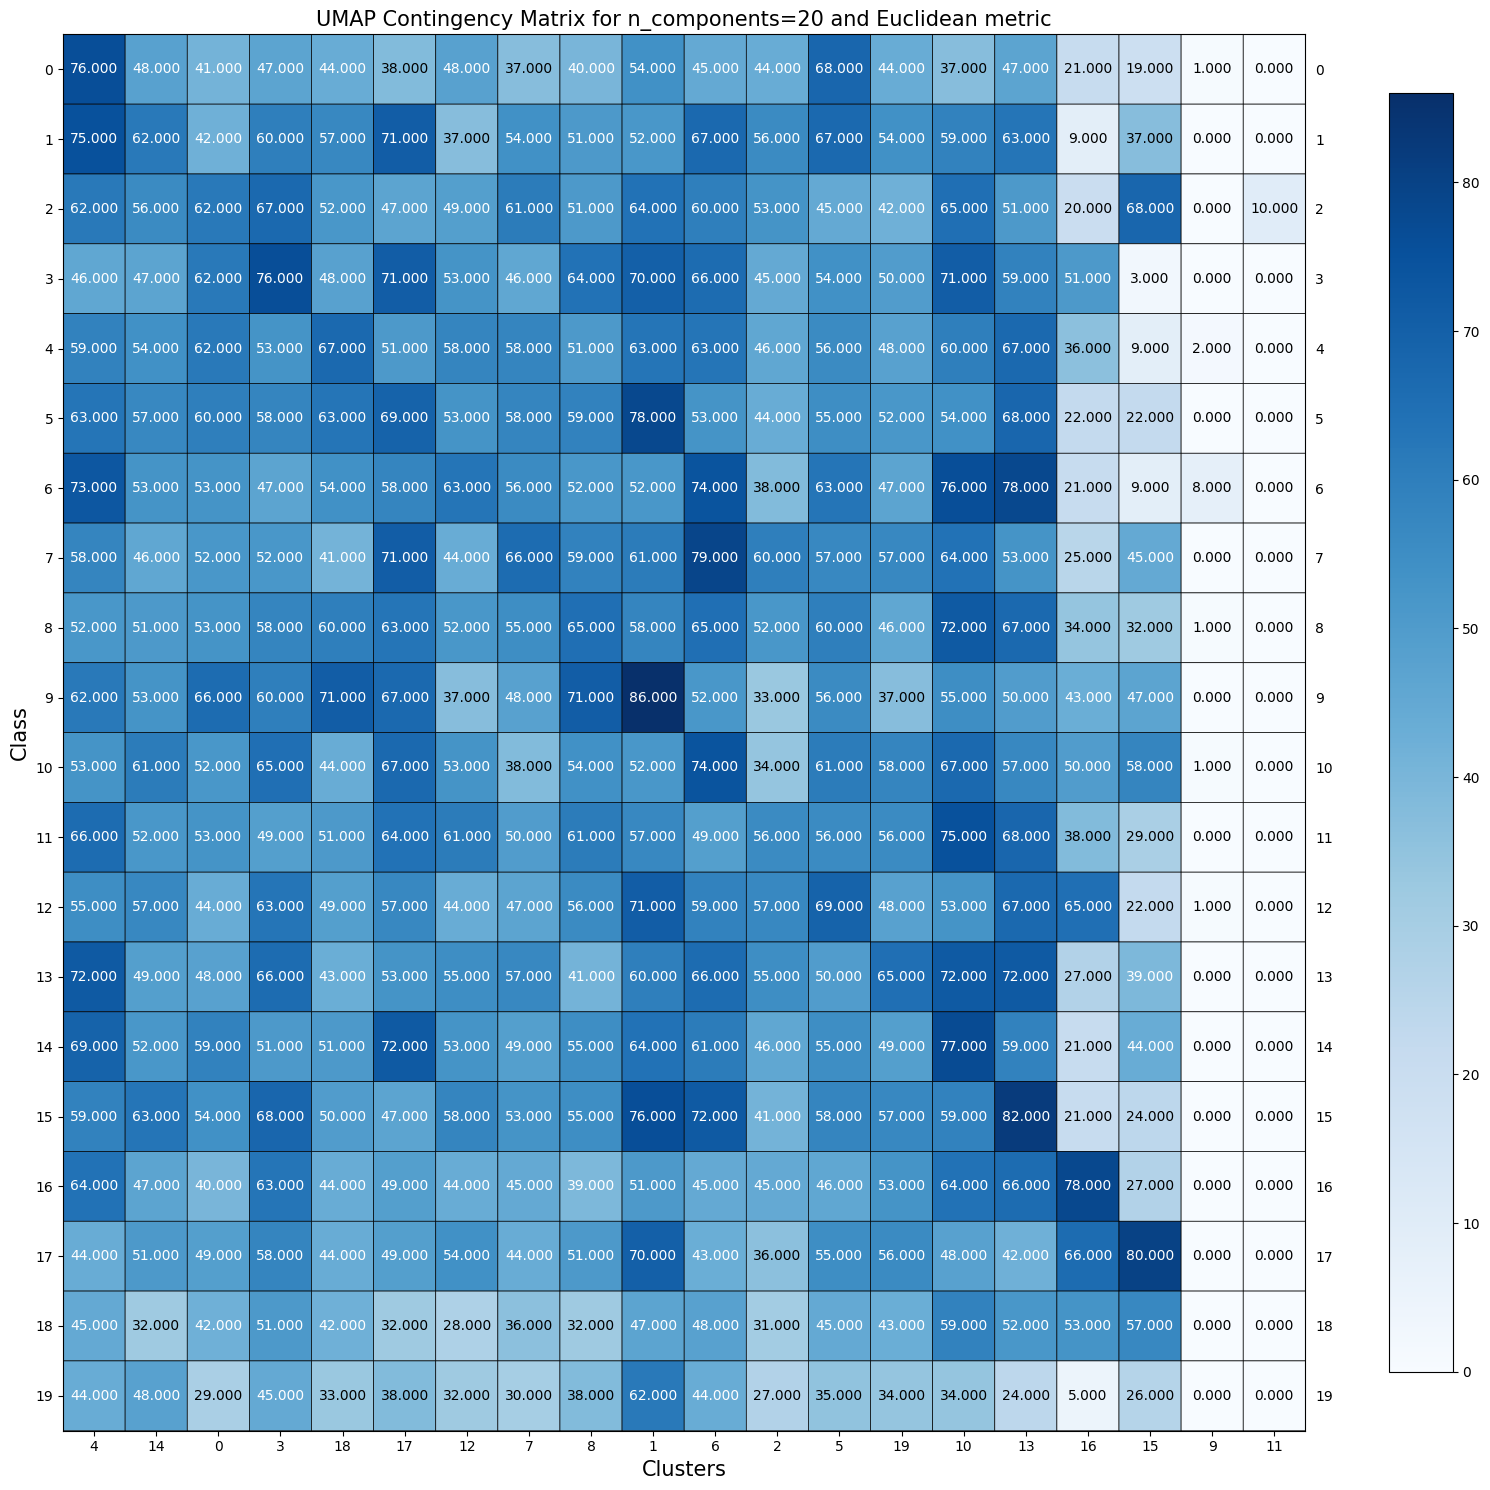


Homogeneity for 20 components and Euclidean metric is 0.008223478183137154 
Completeness for 20 components and Euclidean metric is 0.0085213088359191 
V-measure for 20 components and Euclidean metric is 0.00836974483153552 
Adjusted Rand Index for 20 components and Euclidean metric is 0.0010564993222690014 
Adjusted mutual information score for 20 components and Euclidean metric is 0.005091345924518108 

 
 
 
 


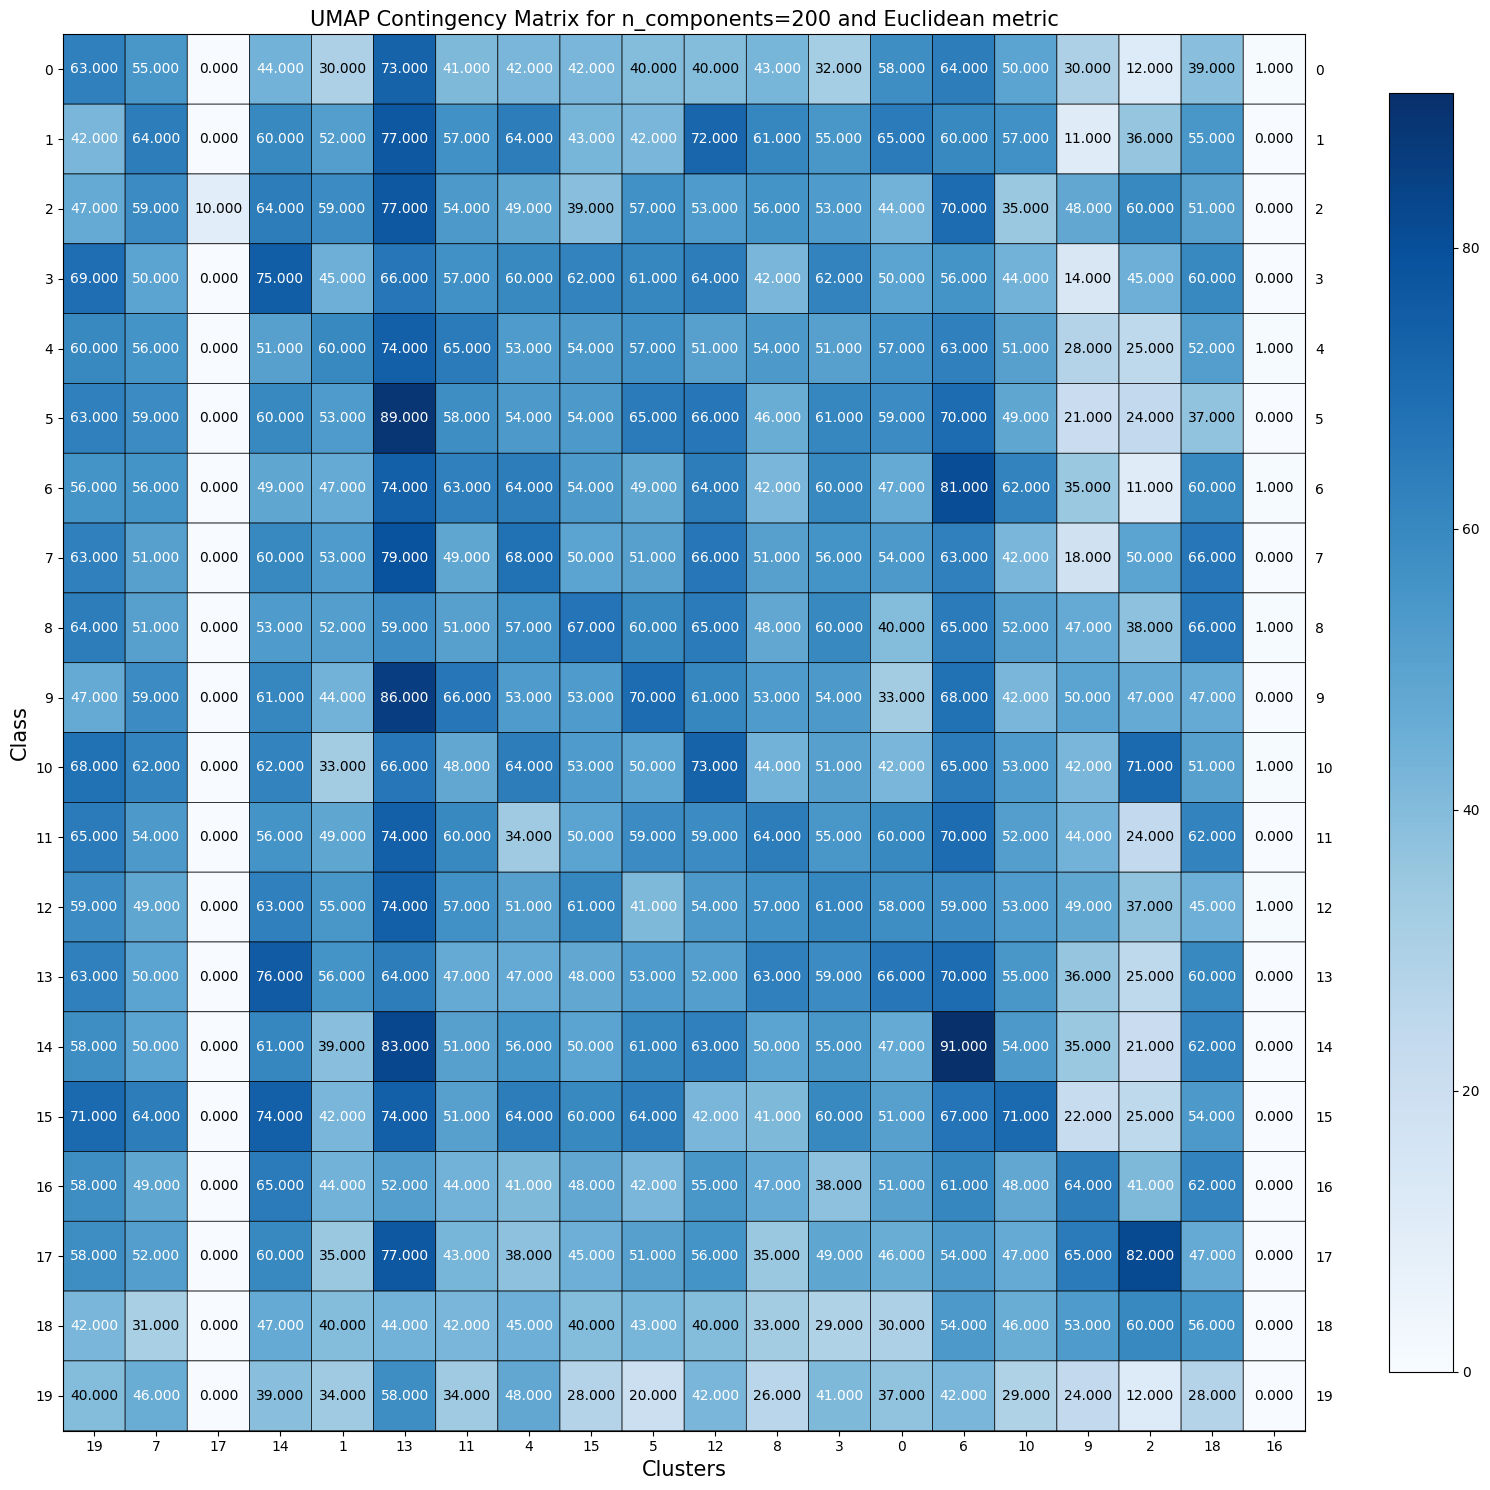


Homogeneity for 200 components and Euclidean metric is 0.006783179825923365 
Completeness for 200 components and Euclidean metric is 0.00703390516122205 
V-measure for 200 components and Euclidean metric is 0.006906267657968123 
Adjusted Rand Index for 200 components and Euclidean metric is 0.0007942374211931178 
Adjusted mutual information score for 200 components and Euclidean metric is 0.0036646122235345392 

 
 
 
 


In [ ]:
#Euclidean

n_comps = [5, 20, 200]

for i in n_comps:
    Tfidf_UMAP_Embedding = umap.UMAP(n_components=i, metric='euclidean').fit_transform(Tfidf_Matrix_20)
    Labels_UMAP = kmean_20.fit_predict(Tfidf_UMAP_Embedding)
    cm = confusion_matrix(Truth_Labels_20, Labels_UMAP)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15), title='UMAP Contingency Matrix for n_components={} and Euclidean metric'.format(i), xlabel='Clusters', ylabel='Class')
    print()
    print('Homogeneity for {} components and Euclidean metric is {} '.format(i,homogeneity_score(Truth_Labels_20, Labels_UMAP)))
    print('Completeness for {} components and Euclidean metric is {} '.format(i,completeness_score(Truth_Labels_20, Labels_UMAP)))
    print('V-measure for {} components and Euclidean metric is {} '.format(i, v_measure_score(Truth_Labels_20, Labels_UMAP)))
    print('Adjusted Rand Index for {} components and Euclidean metric is {} '.format(i,adjusted_rand_score(Truth_Labels_20, Labels_UMAP)))
    print('Adjusted mutual information score for {} components and Euclidean metric is {} '.format(i,adjusted_mutual_info_score(Truth_Labels_20, Labels_UMAP)))
    print('\n \n \n \n ')

# Question 12

For eucllidean metric all of the settings result in poor performance, but 20 n_components seems to perform best. Setting n_components to 20 for the cosine metric also works best. This is because it is beneficial to choose an embedding dimension (n_components) which is closer to the dimension of the underlying manifold on which the data lies which we know is 20. We also see that the cosine metric outperforms the euclidean metric. This is because the cosine distance in UMAP mostly correctly identifies the similarity between the TF-IDF vector of documents while the Euclidean distance usually fails to correctly identify the similarities. 

#Question 13

We suggest reducing the dimension of this 20-class text data with UMAP (with its settings that work best), before performing K-Means clustering. 

#Question 14

Homogeneity score for ward linkage criteria is 0.5557432454221527 
Completeness for ward linkage criteria is 0.588986022533462 
V-measure for ward linkage criteria is 0.5718819511893932 
Adjusted Rand Index for ward linkage criteria is 0.430004590432287 
Adjusted mutual information score for ward linkage criteria is 0.5704462504807448 



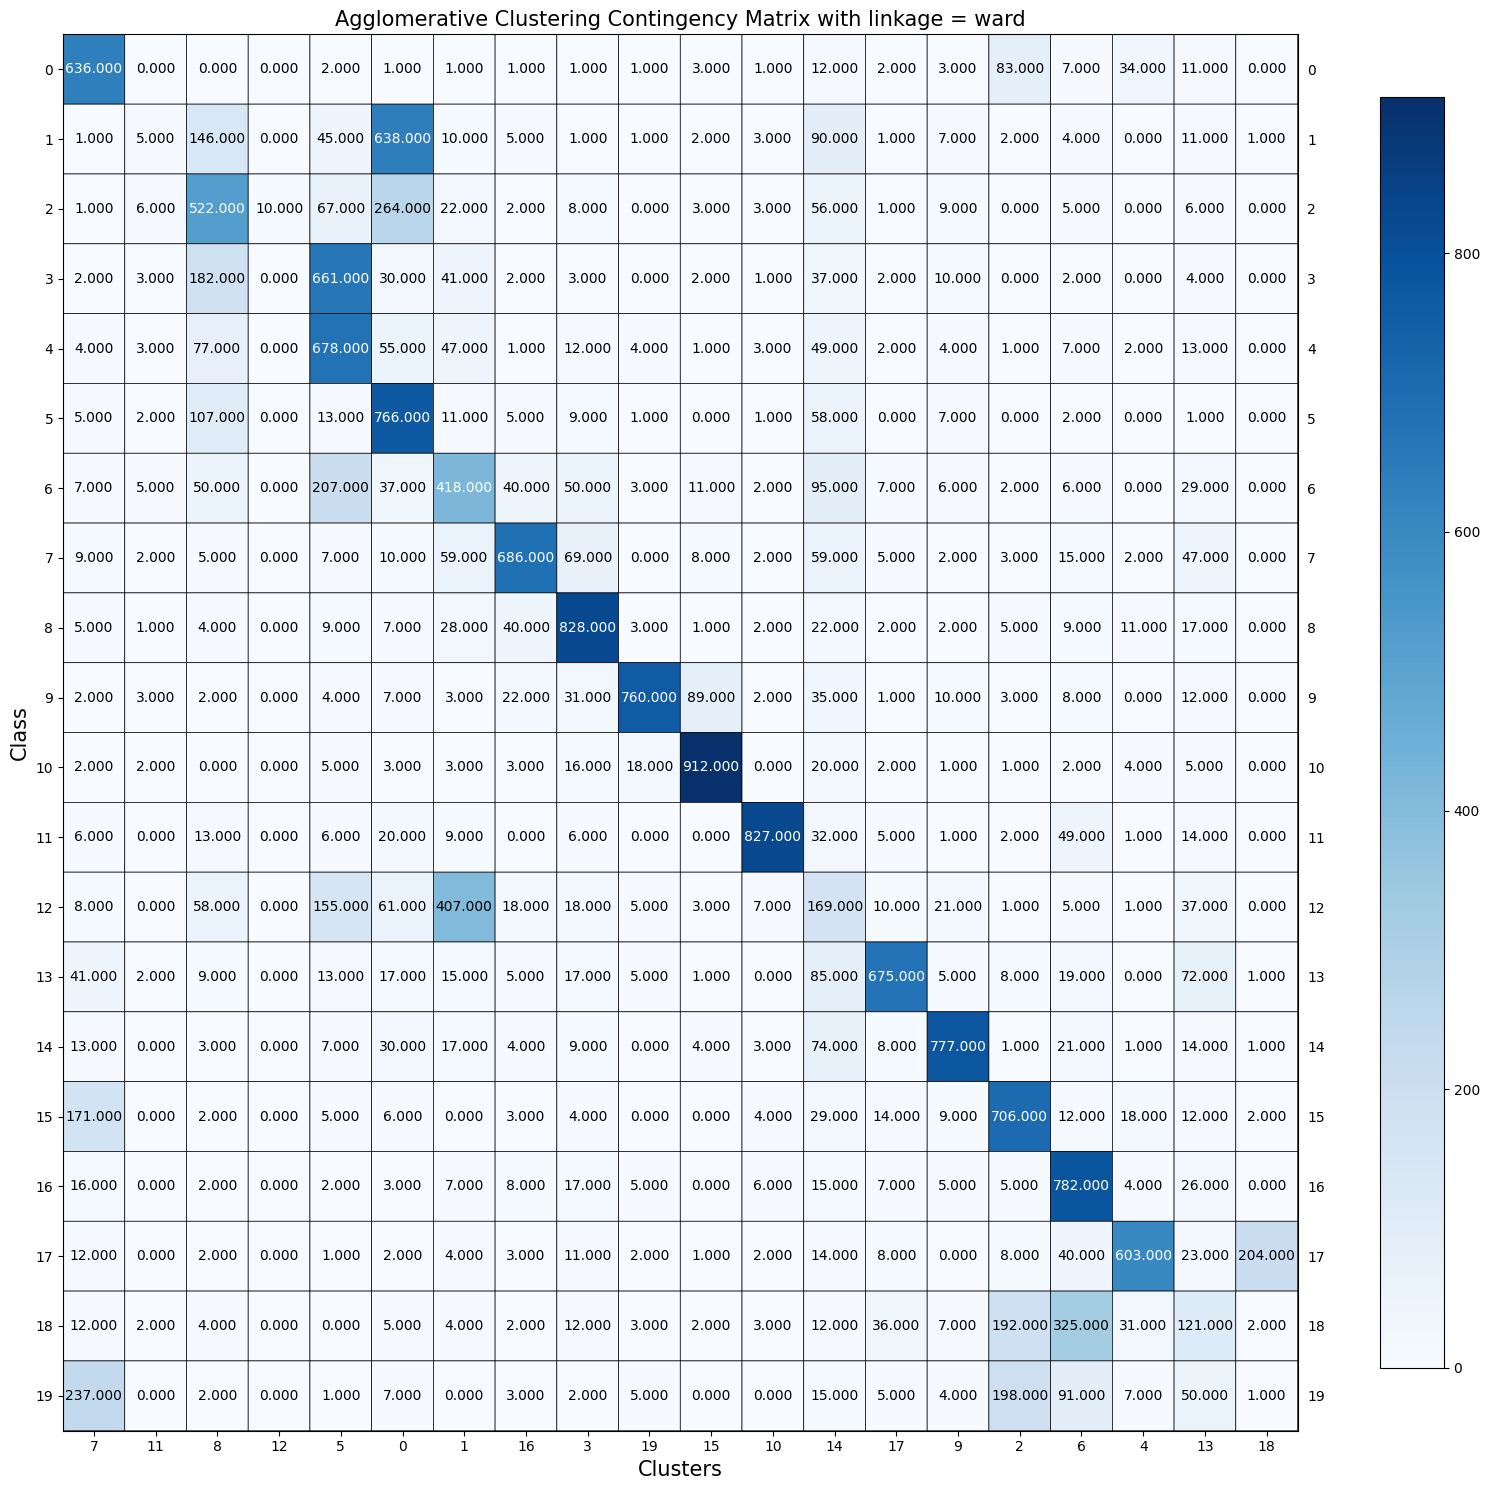

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score

Tfidf_UMAP_Embedding = umap.UMAP(n_components=20, metric='cosine').fit_transform(Tfidf_Matrix_20)


# For linkage = 'ward'
AggloClustering_ward = AgglomerativeClustering(n_clusters=20, linkage='ward')

Labels_AggloClustering_ward = AggloClustering_ward.fit_predict(Tfidf_UMAP_Embedding)

print('Homogeneity score for ward linkage criteria is {} '.format(homogeneity_score(Truth_Labels_20, Labels_AggloClustering_ward)))
print('Completeness for ward linkage criteria is {} '.format(completeness_score(Truth_Labels_20, Labels_AggloClustering_ward)))
print('V-measure for ward linkage criteria is {} '.format(v_measure_score(Truth_Labels_20,Labels_AggloClustering_ward)))
print('Adjusted Rand Index for ward linkage criteria is {} '.format(adjusted_rand_score(Truth_Labels_20, Labels_AggloClustering_ward)))
print('Adjusted mutual information score for ward linkage criteria is {} '.format(adjusted_mutual_info_score(Truth_Labels_20, Labels_AggloClustering_ward)))
print()

cm = confusion_matrix(Truth_Labels_20, Labels_AggloClustering_ward)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15), title='Agglomerative Clustering Contingency Matrix with linkage = ward', xlabel='Clusters', ylabel='Class')

Homogeneity score for single linkage criteria is 0.018694475617256113 
Completeness for single linkage criteria is 0.34467145519294234 
V-measure for single linkage criteria is  0.03546536187749717 
Adjusted Rand Index for single linkage criteria is 0.0006403105728320621 
Adjusted mutual information score for single linkage criteria is 0.03011407030259116 


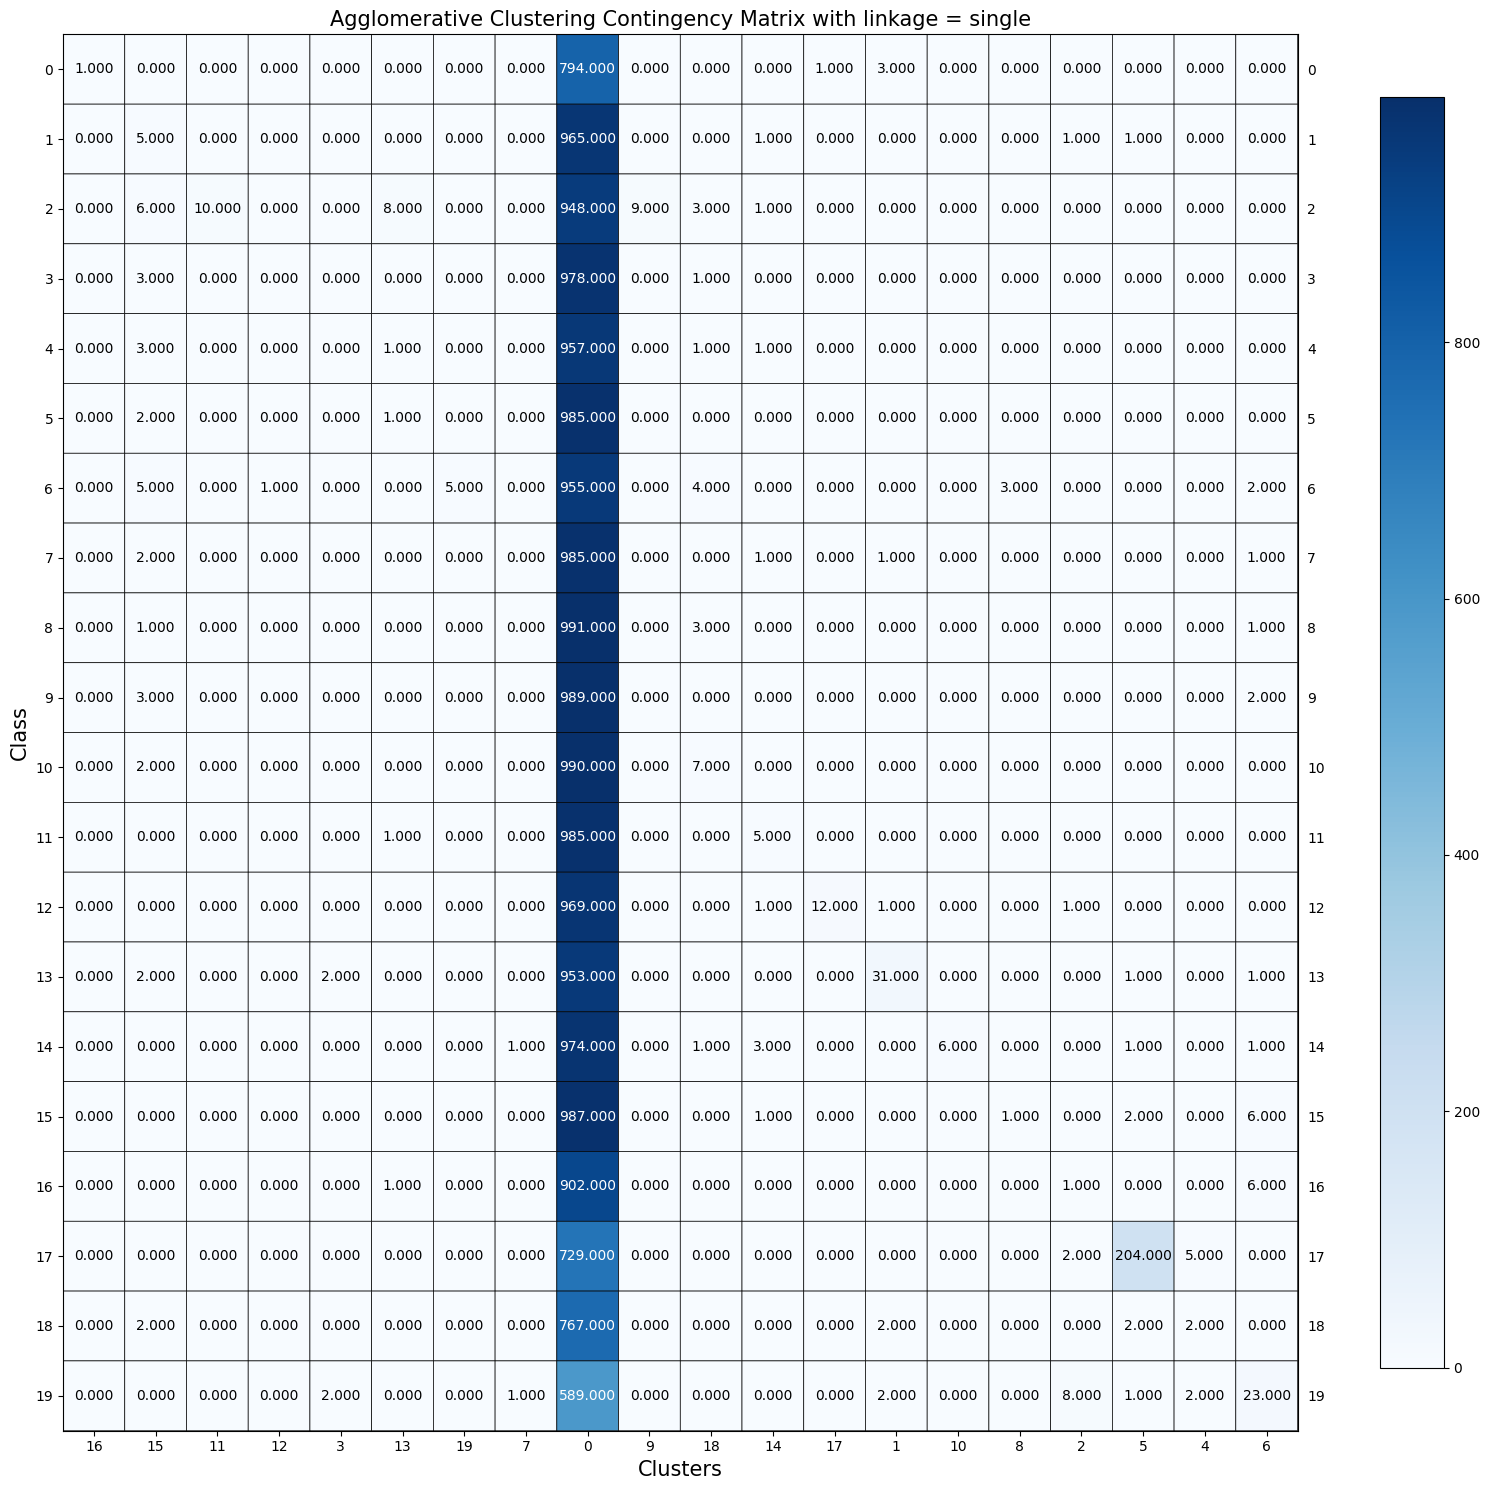

In [ ]:
# For linkage = 'single'

AggloClustering_single = AgglomerativeClustering(n_clusters=20, linkage='single')

Labels_AggloClustering_single = AggloClustering_single.fit_predict(Tfidf_UMAP_Embedding)

print('Homogeneity score for single linkage criteria is {} '.format(homogeneity_score(Truth_Labels_20, Labels_AggloClustering_single)))
print('Completeness for single linkage criteria is {} '.format(completeness_score(Truth_Labels_20, Labels_AggloClustering_single)))
print('V-measure for single linkage criteria is  {} '.format(v_measure_score(Truth_Labels_20, Labels_AggloClustering_single)))
print('Adjusted Rand Index for single linkage criteria is {} '.format(adjusted_rand_score(Truth_Labels_20, Labels_AggloClustering_single)))
print('Adjusted mutual information score for single linkage criteria is {} '.format(adjusted_mutual_info_score(Truth_Labels_20, Labels_AggloClustering_single)))

cm = confusion_matrix(Truth_Labels_20, Labels_AggloClustering_single)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15), title='Agglomerative Clustering Contingency Matrix with linkage = single', xlabel='Clusters', ylabel='Class')

# Question 15

In [ ]:
!pip install hdbscan
import hdbscan

Tfidf_UMAP_Embedding = umap.UMAP(n_components=20, metric='cosine').fit_transform(Tfidf_Matrix_20)

s = [20,100,200]

for i in s:
    print()
    Hdbscan = hdbscan.HDBSCAN(min_cluster_size=i)
    Labels_Hdbscan = Hdbscan.fit_predict(Tfidf_UMAP_Embedding)
    print('Homogeneity for min_cluster size={}  is {} '.format(i,homogeneity_score(Truth_Labels_20, Labels_Hdbscan)))
    print('Completeness for  min_cluster size={} is {} '.format(i,completeness_score(Truth_Labels_20, Labels_Hdbscan)))
    print('V-measure for min_cluster size={} is {} '.format(i, v_measure_score(Truth_Labels_20, Labels_Hdbscan)))
    print('Adjusted Rand Index for  min_cluster size={} is {} '.format(i,adjusted_rand_score(Truth_Labels_20, Labels_Hdbscan)))
    print('Adjusted mutual information score for min_cluster size={} is {} '.format(i,adjusted_mutual_info_score(Truth_Labels_20, Labels_Hdbscan)))
    print('\n \n \n')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 69.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541552 sha256=9ed6ad48be6c5aaf8ee4585aefe6a9acdbf8666e923228ab46a5241ce1d95b49
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan

Homogeneity for min_cluster size=20  is 0.4167114794070086 
Completeness for  min_cluster size=20 is 0.4328083560827574 
V-measure for min_cluster size=20 is 0.4246074142788722 
Adjusted Rand Index for  min_cluster size=20 is 0.07472313662075739 
Adjusted mutual information score for min_cluster size=20 is 0.41212890723658296 

 
 


Homogeneity for min_cluster size=100  is 0.401493

# Question 16

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


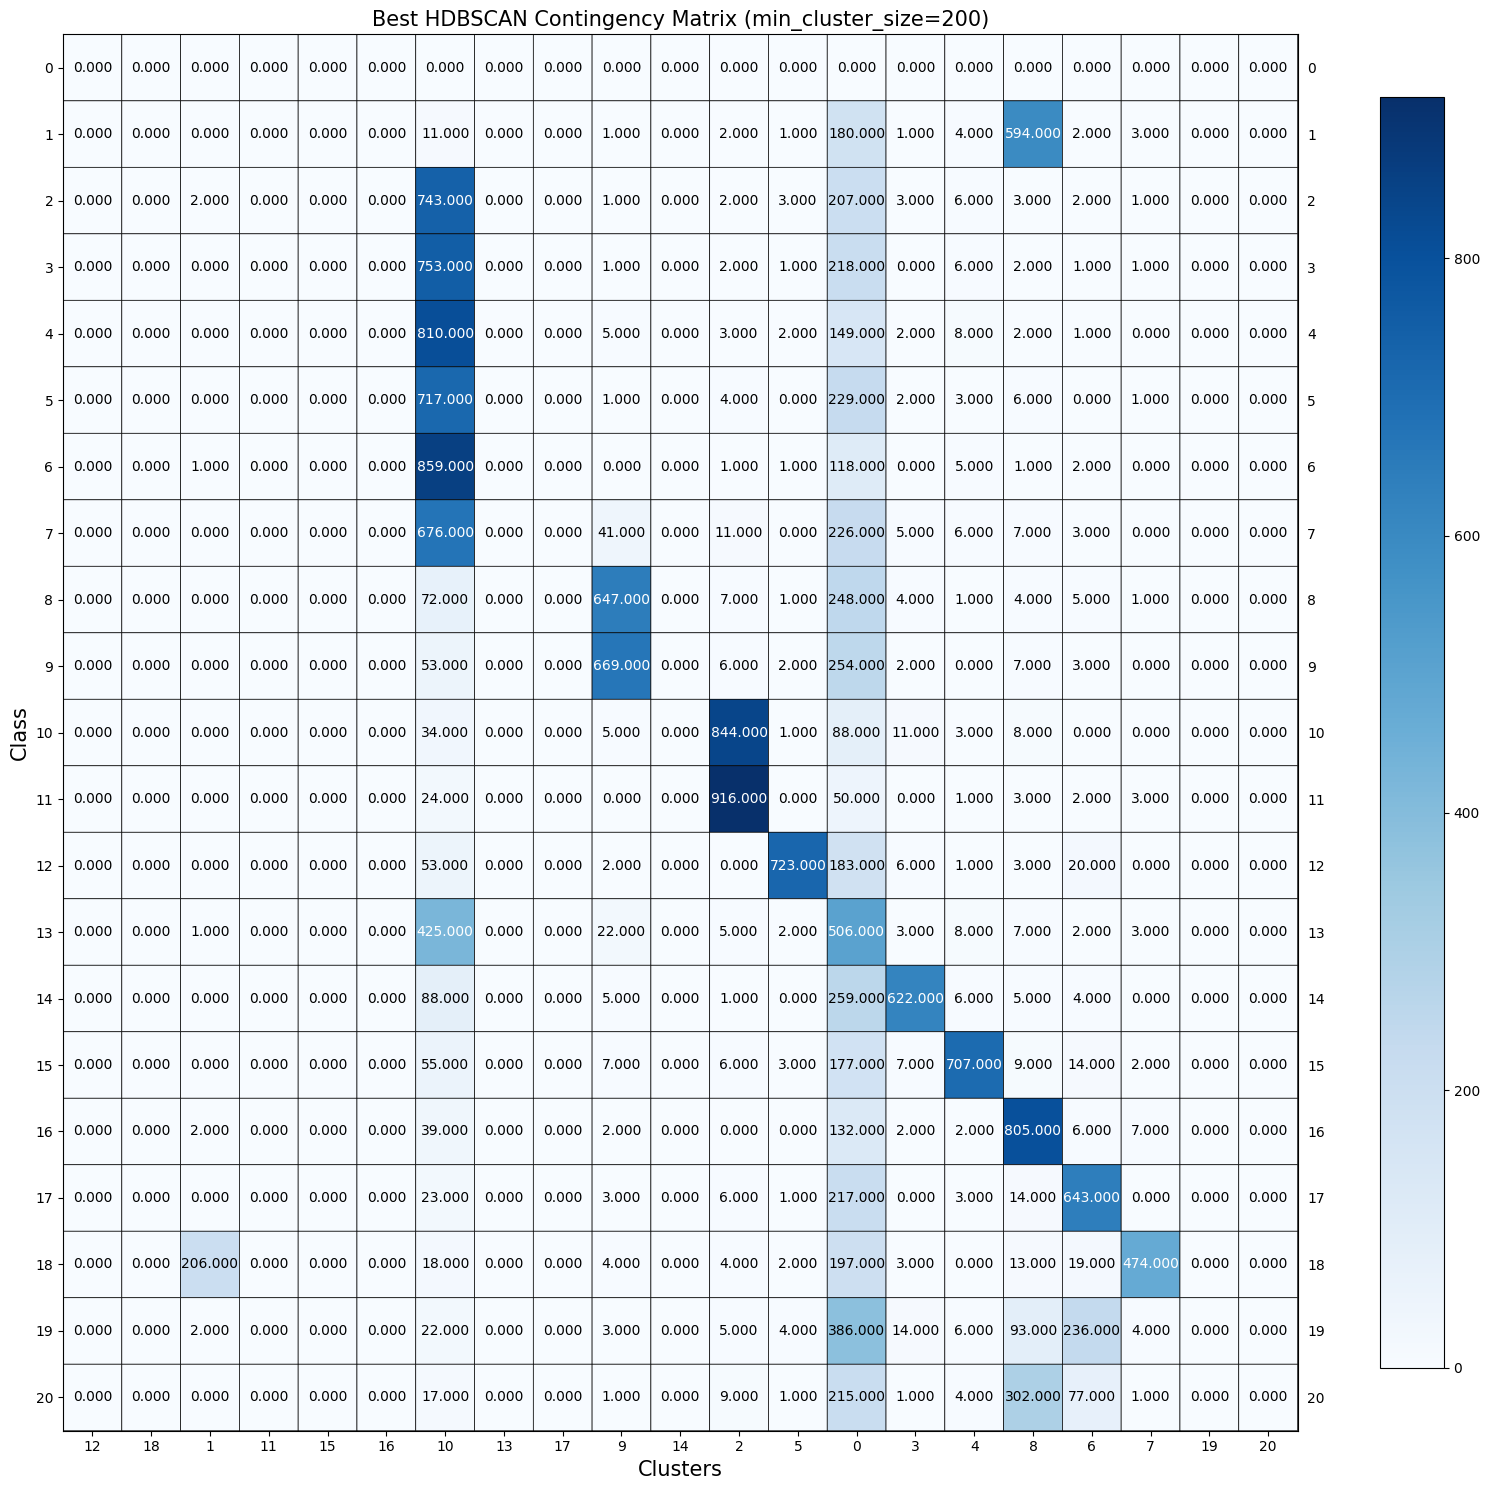

In [ ]:
!pip install hdbscan
import hdbscan
!pip install umap-learn[plot]
import umap
from plotmat import plot_mat # using the provided plotmat.py
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

Best_hdbscan = hdbscan.HDBSCAN(min_cluster_size=200)

Tfidf_UMAP_Embedding = umap.UMAP(n_components=20, metric='cosine').fit_transform(Tfidf_Matrix_20)

Best_Labels_hdbscan = Best_hdbscan.fit_predict(Tfidf_UMAP_Embedding)

cm = confusion_matrix(Truth_Labels_20, Best_Labels_hdbscan)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15), title='Best HDBSCAN Contingency Matrix (min_cluster_size=200)', xlabel='Clusters', ylabel='Class')

# Question 17

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from shutil import rmtree
import pandas as pd


from joblib import Memory
import joblib

!pip install hdbscan
import hdbscan

from sklearn.cluster import AgglomerativeClustering
 
 #Fetch data for 20 categories
import numpy as np
import random
np.random.seed(42)
random.seed(42)

from sklearn.datasets import fetch_20newsgroups

dataset20 = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=('headers', 'footers'))

Truth_Labels_20 = dataset20.target

#Construct TF-IDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_Vectorizer = TfidfVectorizer(min_df=3, stop_words='english')

#Tfidf_Matrix = Tfidf_Vector.fit_transform(dataset20.data)
Tfidf_Matrix_20 = Tfidf_Vectorizer.fit_transform(dataset20.data)

from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

!pip install umap-learn[plot]
import umap


def nodimreduction(doc):
  return doc 
  
class AgglomerativeClusteringWrapper(AgglomerativeClustering):
    def predict(self,X):
      return self.labels_.astype(int)

class hdbscanWrapper(hdbscan.HDBSCAN):
    def predict(self,X):
      return self.labels_.astype(int)

cachedir = mkdtemp()
memory = Memory(location = cachedir, verbose=10)

pipe = Pipeline(steps=[
    ('Dim_reduction', FunctionTransformer(nodimreduction)),
    ('Clustering', KMeans(n_clusters = 10, random_state = 0, max_iter = 1000, n_init = 40)),  
], memory=memory)

params = {
    'Dim_reduction': [FunctionTransformer(nodimreduction),TruncatedSVD(n_components = 5, random_state=42), TruncatedSVD(n_components = 20, random_state=42), 
                      TruncatedSVD(n_components = 200, random_state=42), NMF(n_components=5, init='random', random_state=42), 
                      NMF(n_components=20, init='random', random_state=42), NMF(n_components=200, init='random', random_state=42), umap.UMAP(n_components=5, metric='cosine'), 
                      umap.UMAP(n_components=20, metric='cosine'), umap.UMAP(n_components=200, metric='cosine')],
          
    'Clustering': [KMeans(n_clusters = 10, random_state = 0, max_iter = 1000, n_init = 40), KMeans(n_clusters = 20, random_state = 0, max_iter = 1000, n_init = 40), 
                   KMeans(n_clusters = 50, random_state = 0, max_iter = 1000, n_init = 40), AgglomerativeClusteringWrapper(n_clusters=20, linkage='ward'), 
                   hdbscanWrapper(min_cluster_size=100), hdbscanWrapper(min_cluster_size=200)],
}


search = GridSearchCV(pipe, params, scoring="accuracy", cv=2, n_jobs=1)


search.fit(Tfidf_Matrix_20, Truth_Labels_20)

results = pd.DataFrame(search.cv_results_)
results.sort_values(by ='rank_test_score', inplace=True, ignore_index=True)

params_1st_best = results.loc[0, 'params']
params_2nd_best = results.loc[1, 'params']
params_3rd_best = results.loc[2, 'params']
params_4th_best = results.loc[3, 'params']
params_5th_best = results.loc[4, 'params']

clf_1st_best = search.best_estimator_.set_params(**params_1st_best)
clf_2nd_best = search.best_estimator_.set_params(**params_2nd_best)
clf_3rd_best = search.best_estimator_.set_params(**params_3rd_best)
clf_4th_best = search.best_estimator_.set_params(**params_4th_best)
clf_5th_best = search.best_estimator_.set_params(**params_5th_best)

print('The best combination has a mean test score of {}.\nIts combination is: {}'.format(results.loc[0, 'mean_test_score'],params_1st_best))
print('{}\n \n \n'.format(clf_1st_best))

print('The 2nd best combination has a mean test score of {}.\nIts combination is: {}'.format(results.loc[1, 'mean_test_score'],params_2nd_best))
print('{}\n \n \n'.format(clf_2nd_best))

print('The 3rd best combination has a mean test score of {}.\nIts combination is: {}'.format(results.loc[2, 'mean_test_score'],params_3rd_best))
print('{}\n \n \n'.format(clf_3rd_best))

print('The 4th best combination has a mean test score of {}.\nIts combination is: {}'.format(results.loc[3, 'mean_test_score'],params_4th_best))
print('{}\n \n \n'.format(clf_4th_best))

print('The 5th best combination has a mean test score of {}.\nIts combination is: {}'.format(results.loc[4, 'mean_test_score'],params_5th_best))
print('{}\n \n \n'.format(clf_5th_best))
rmtree(cachedir)

# Question 18

In [ ]:
# To further enhance the clustering perofrmance for K-means, clean the data by lemmatizing and then remove stop words before clustering for the best found pipeline:
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score
import nltk
nltk.download('names')
nltk.download('wordnet')
def is_letter_only(word):
  for char in word:
    if not char.isalpha():
      return False
  return True

from nltk.corpus import names
all_names = set(names.words())
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

data_cleaned = []
for doc in dataset20.data:
  doc = doc.lower()
  doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
  data_cleaned.append(doc_cleaned)

kmean_20 = KMeans(n_clusters = 10, random_state = 0, max_iter = 1000, n_init = 50)  

Tfidf_Vectorizer = TfidfVectorizer(min_df=3, stop_words='english')

Tfidf_Matrix_20_cleaned = Tfidf_Vectorizer.fit_transform(data_cleaned)

Tfidf_UMAP_Embedding_cleaned = umap.UMAP(n_components=5, metric='cosine').fit_transform(Tfidf_Matrix_20_cleaned)
Labels_UMAP_cleaned = kmean_20.fit_predict(Tfidf_UMAP_Embedding_cleaned)


print('Homogeneity is {} '.format(homogeneity_score(Truth_Labels_20, Labels_UMAP_cleaned)))
print('Completeness  is {} '.format(completeness_score(Truth_Labels_20, Labels_UMAP_cleaned)))
print('V-measure is {} '.format(v_measure_score(Truth_Labels_20, Labels_UMAP_cleaned)))
print('Adjusted Rand Index  is {} '.format(adjusted_rand_score(Truth_Labels_20, Labels_UMAP_cleaned)))
print('Adjusted mutual information score  is {} '.format(adjusted_mutual_info_score(Truth_Labels_20, Labels_UMAP_cleaned)))

In [ ]:
# Compare to best pipeline with uncleaned data 
#Fetch data for 20 categories
import numpy as np
import random
np.random.seed(42)
random.seed(42)

from sklearn.datasets import fetch_20newsgroups

ddataset20 = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=('headers', 'footers'))
Truth_Labels_20 = ddataset20.target

kmean_20 = KMeans(n_clusters = 10, random_state = 0, max_iter = 1000, n_init = 50)  

Tfidf_Vectorizer = TfidfVectorizer(min_df=3, stop_words='english')

Tfidf_Matrix_20 = Tfidf_Vectorizer.fit_transform(ddataset20.data)

Tfidf_UMAP_Embedding = umap.UMAP(n_components=5, metric='cosine').fit_transform(Tfidf_Matrix_20)
Labels_UMAP = kmean_20.fit_predict(Tfidf_UMAP_Embedding)

print('Homogeneity  is {} '.format(homogeneity_score(Truth_Labels_20, Labels_UMAP)))
print('Completeness  is {} '.format(completeness_score(Truth_Labels_20, Labels_UMAP)))
print('V-measure  is {} '.format(v_measure_score(Truth_Labels_20, Labels_UMAP)))
print('Adjusted Rand Index  is {} '.format(adjusted_rand_score(Truth_Labels_20, Labels_UMAP)))
print('Adjusted mutual information score  is {} '.format(adjusted_mutual_info_score(Truth_Labels_20, Labels_UMAP)))